# BÁO CÁO THỰC HÀNH: TRỰC QUAN HÓA DỮ LIỆU
## Lab 01 - Bài tập thực hành với dữ liệu thực tế

**Sinh viên:** [Tên sinh viên]  
**MSSV:** [Mã số sinh viên]  
**Ngày:** [Ngày thực hiện]


## MỤC LỤC

1. [Chuẩn bị môi trường và thư viện](#1-chuẩn-bị-môi-trường-và-thư-viện)
2. [Bài tập thực hành 1: Phân tích chất lượng rượu đỏ](#2-bài-tập-thực-hành-1-phân-tích-chất-lượng-rượu-đỏ)
3. [Bài tập thực hành 2: Phân tích dữ liệu bệnh tiểu đường](#3-bài-tập-thực-hành-2-phân-tích-dữ-liệu-bệnh-tiểu-đường)
4. [Bài tập thực hành 3: EDA dữ liệu mua sắm siêu thị](#4-bài-tập-thực-hành-3-eda-dữ-liệu-mua-sắm-siêu-thị)
5. [Tổng kết và đánh giá](#5-tổng-kết-và-đánh-giá)


## 1. CHUẨN BỊ MÔI TRƯỜNG VÀ THƯ VIỆN


In [54]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import os

# Tạo thư mục pic để lưu ảnh
os.makedirs('pic', exist_ok=True)

# Cấu hình
warnings.filterwarnings('ignore')
plt.style.use('default')  # Sử dụng style mặc định để tránh lỗi
sns.set_palette("husl")

# Thiết lập font cho tiếng Việt
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# Thiết lập kích thước mặc định cho biểu đồ
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

print("✅ Đã import thành công tất cả thư viện!")
print("📁 Đã tạo thư mục 'pic' để lưu ảnh")
print("📊 Sẵn sàng cho các bài tập thực hành")


✅ Đã import thành công tất cả thư viện!
📁 Đã tạo thư mục 'pic' để lưu ảnh
📊 Sẵn sàng cho các bài tập thực hành


## 2. BÀI TẬP THỰC HÀNH 1: PHÂN TÍCH CHẤT LƯỢNG RƯỢU ĐỎ

### 2.1. Tổng quan về dữ liệu
- **Nguồn dữ liệu**: Kaggle - Red Wine Quality Classification
- **File**: winequality-red.csv
- **Mục tiêu**: Phân tích và trực quan hóa các yếu tố ảnh hưởng đến chất lượng rượu đỏ


In [55]:
# Đọc dữ liệu rượu đỏ
wine_data = pd.read_csv('Data/winequality-red.csv')

print("📊 THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU RƯỢU ĐỎ")
print("="*50)
print(f"Kích thước dữ liệu: {wine_data.shape}")
print(f"Số lượng mẫu: {wine_data.shape[0]}")
print(f"Số lượng thuộc tính: {wine_data.shape[1]}")
print("\n📋 Các cột trong dataset:")
print(wine_data.columns.tolist())
print("\n📈 Thông tin cơ bản:")
print(wine_data.info())
print("\n🔍 5 dòng đầu tiên:")
wine_data.head()


📊 THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU RƯỢU ĐỎ
Kích thước dữ liệu: (1599, 12)
Số lượng mẫu: 1599
Số lượng thuộc tính: 12

📋 Các cột trong dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

📈 Thông tin cơ bản:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-nu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
# Thống kê mô tả và kiểm tra dữ liệu
print("📊 THỐNG KÊ MÔ TẢ DỮ LIỆU RƯỢU ĐỎ")
print("="*50)
print(wine_data.describe())

print("\n🔍 KIỂM TRA DỮ LIỆU THIẾU")
print("="*30)
missing_data = wine_data.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "✅ Không có dữ liệu thiếu")

print("\n🍷 PHÂN BỐ CHẤT LƯỢNG RƯỢU")
print("="*35)
quality_counts = wine_data['quality'].value_counts().sort_index()
print(quality_counts)
print(f"\nChất lượng rượu từ {wine_data['quality'].min()} đến {wine_data['quality'].max()}")
print(f"Chất lượng trung bình: {wine_data['quality'].mean():.2f}")
print(f"Độ lệch chuẩn: {wine_data['quality'].std():.2f}")


📊 THỐNG KÊ MÔ TẢ DỮ LIỆU RƯỢU ĐỎ
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012

### 2.2. Trực quan hóa dữ liệu rượu đỏ


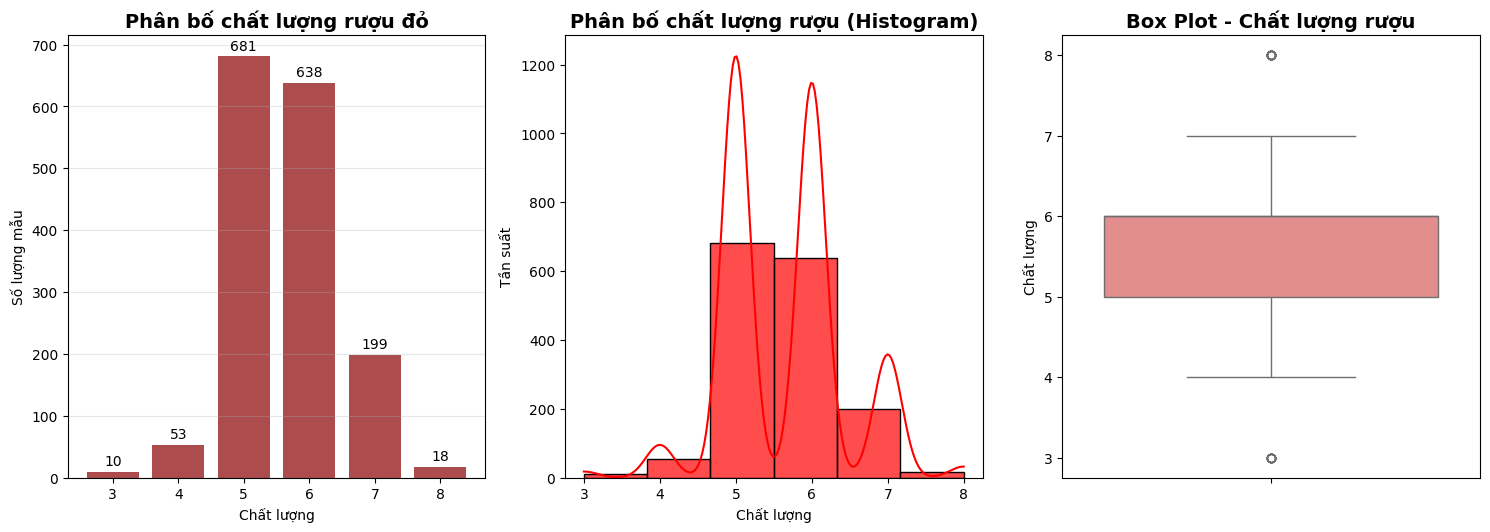

📁 Đã xuất biểu đồ phân bố chất lượng rượu: wine_quality_distribution.png


In [57]:
# 1. Phân bố chất lượng rượu
plt.figure(figsize=(15, 10))

# Subplot 1: Bar chart phân bố chất lượng
plt.subplot(2, 3, 1)
quality_counts = wine_data['quality'].value_counts().sort_index()
bars = plt.bar(quality_counts.index, quality_counts.values, color='darkred', alpha=0.7)
plt.title('Phân bố chất lượng rượu đỏ', fontsize=14, fontweight='bold')
plt.xlabel('Chất lượng')
plt.ylabel('Số lượng mẫu')
plt.grid(axis='y', alpha=0.3)

# Thêm giá trị lên cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

# Subplot 2: Histogram chất lượng với Seaborn
plt.subplot(2, 3, 2)
sns.histplot(wine_data['quality'], bins=6, kde=True, color='red', alpha=0.7)
plt.title('Phân bố chất lượng rượu (Histogram)', fontsize=14, fontweight='bold')
plt.xlabel('Chất lượng')
plt.ylabel('Tần suất')

# Subplot 3: Box plot chất lượng
plt.subplot(2, 3, 3)
sns.boxplot(y=wine_data['quality'], color='lightcoral')
plt.title('Box Plot - Chất lượng rượu', fontsize=14, fontweight='bold')
plt.ylabel('Chất lượng')

plt.tight_layout()
plt.savefig('pic/wine_quality_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("📁 Đã xuất biểu đồ phân bố chất lượng rượu: wine_quality_distribution.png")


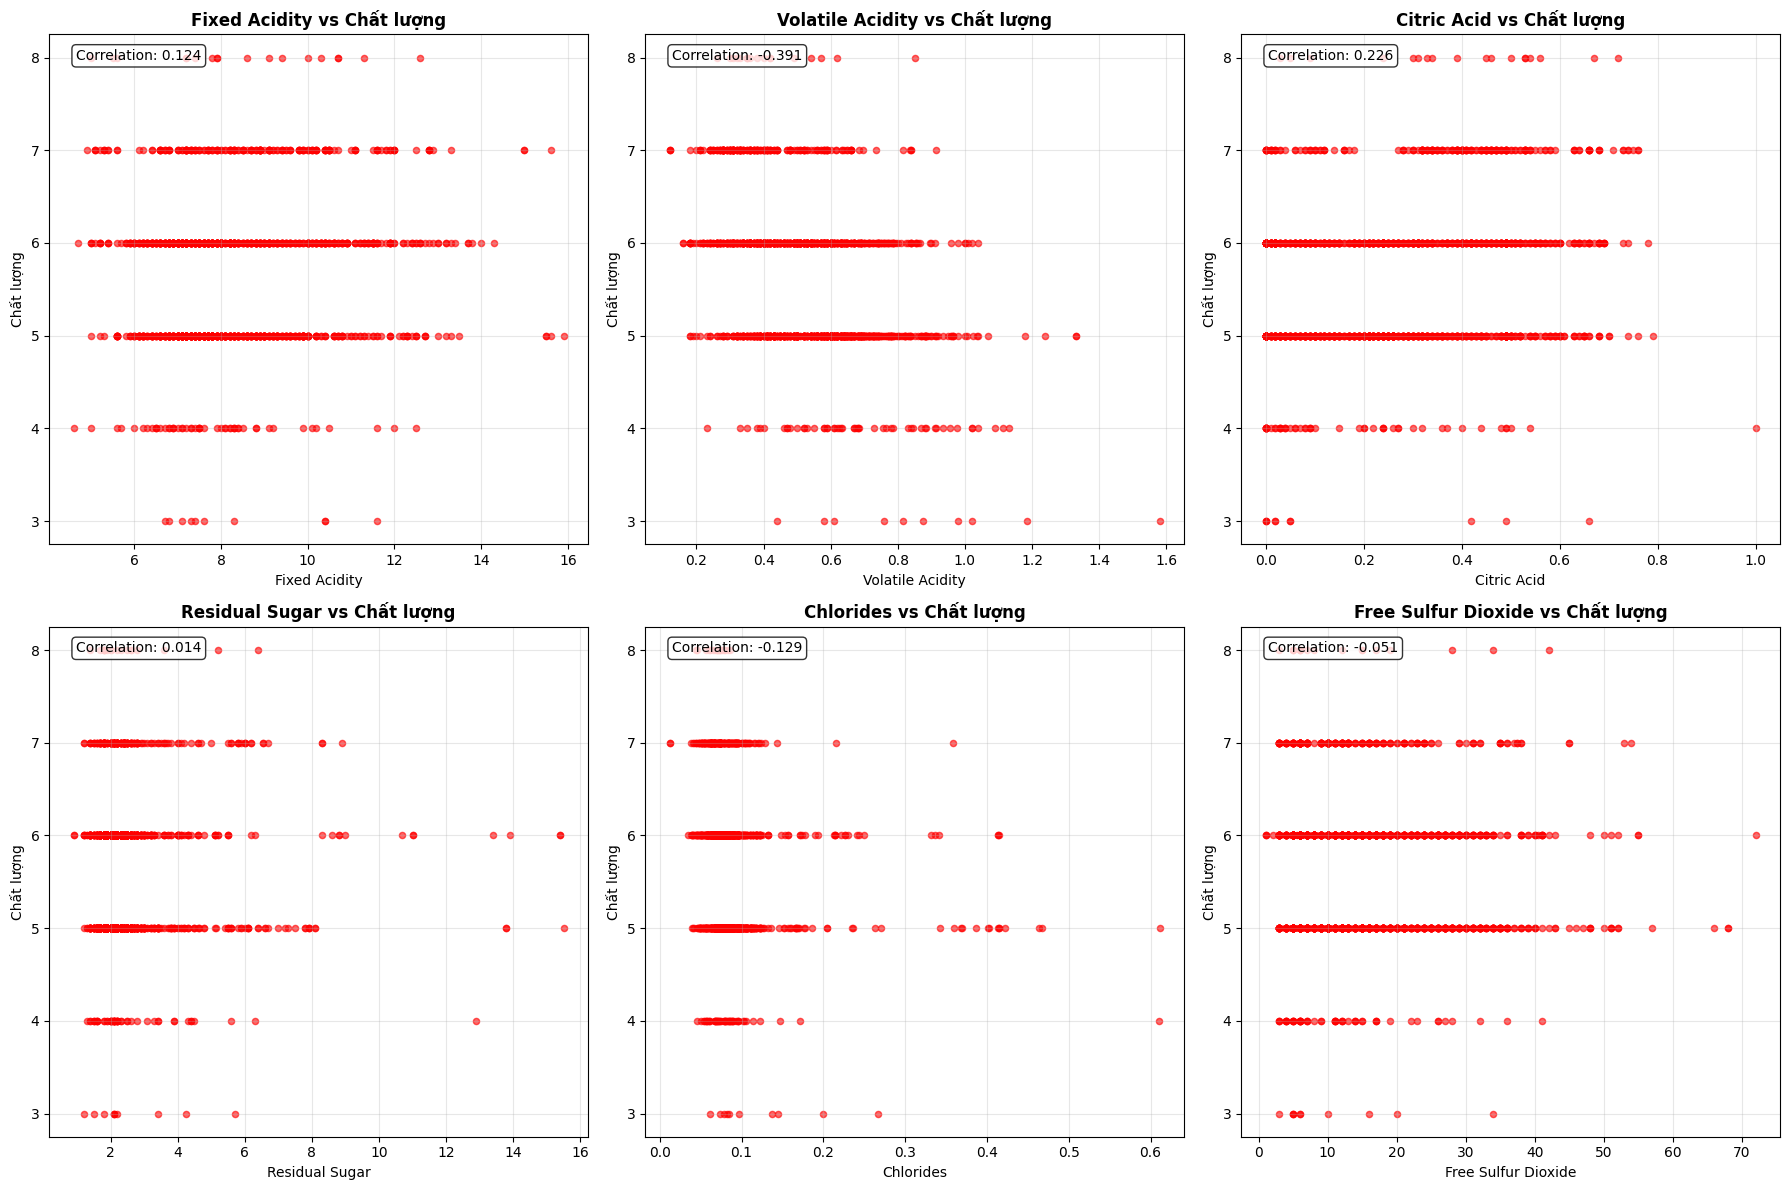

📁 Đã xuất biểu đồ mối quan hệ các yếu tố vs chất lượng: wine_features_vs_quality.png


In [58]:
# 2. Phân tích các yếu tố hóa học ảnh hưởng đến chất lượng
plt.figure(figsize=(18, 12))

# Chọn các biến quan trọng để phân tích
important_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                     'pH', 'sulphates', 'alcohol']

# Tạo subplots cho từng biến
for i, feature in enumerate(important_features[:6], 1):
    plt.subplot(2, 3, i)
    
    # Scatter plot: biến vs chất lượng
    plt.scatter(wine_data[feature], wine_data['quality'], alpha=0.6, color='red', s=20)
    plt.title(f'{feature.title()} vs Chất lượng', fontsize=12, fontweight='bold')
    plt.xlabel(feature.title())
    plt.ylabel('Chất lượng')
    plt.grid(True, alpha=0.3)
    
    # Tính correlation
    corr = wine_data[feature].corr(wine_data['quality'])
    plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('pic/wine_features_vs_quality.png', dpi=300, bbox_inches='tight')
plt.show()

# Xuất biểu đồ
print("📁 Đã xuất biểu đồ mối quan hệ các yếu tố vs chất lượng: wine_features_vs_quality.png")


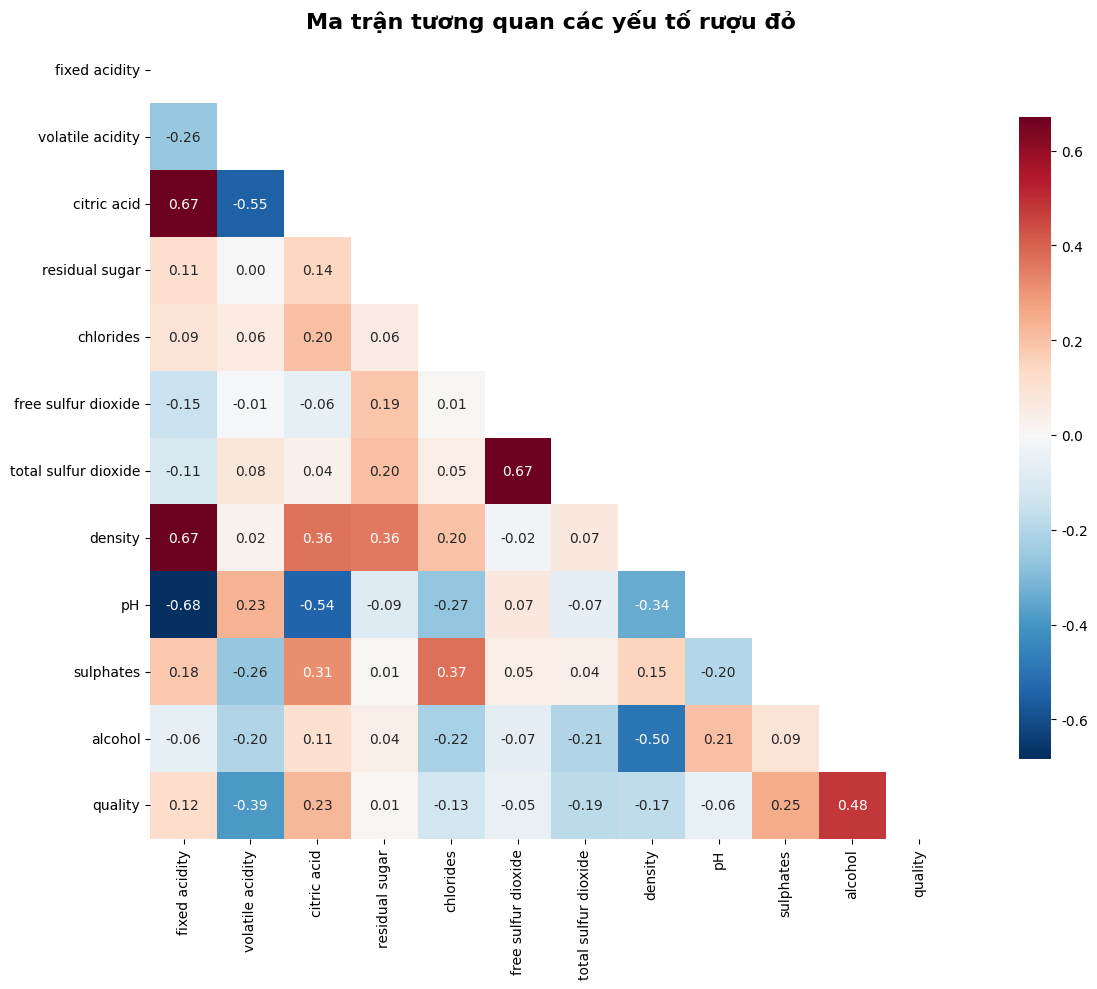

📁 Đã xuất ma trận tương quan: wine_correlation_matrix.png

🔍 TOP 5 YẾU TỐ CÓ TƯƠNG QUAN MẠNH NHẤT VỚI CHẤT LƯỢNG:
1. alcohol: 0.476
2. volatile acidity: 0.391
3. sulphates: 0.251
4. citric acid: 0.226
5. total sulfur dioxide: 0.185


In [59]:
# 3. Ma trận tương quan (Correlation Matrix)
plt.figure(figsize=(14, 10))

# Tính correlation matrix
correlation_matrix = wine_data.corr()

# Tạo heatmap với Seaborn
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Ẩn phần trên của ma trận
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})

plt.title('Ma trận tương quan các yếu tố rượu đỏ', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('pic/wine_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Xuất biểu đồ
print("📁 Đã xuất ma trận tương quan: wine_correlation_matrix.png")

# Hiển thị các correlation mạnh nhất với quality
print("\n🔍 TOP 5 YẾU TỐ CÓ TƯƠNG QUAN MẠNH NHẤT VỚI CHẤT LƯỢNG:")
print("="*60)
quality_corr = correlation_matrix['quality'].abs().sort_values(ascending=False)
for i, (feature, corr) in enumerate(quality_corr[1:6].items(), 1):  # Bỏ qua 'quality' tự tương quan
    print(f"{i}. {feature}: {corr:.3f}")


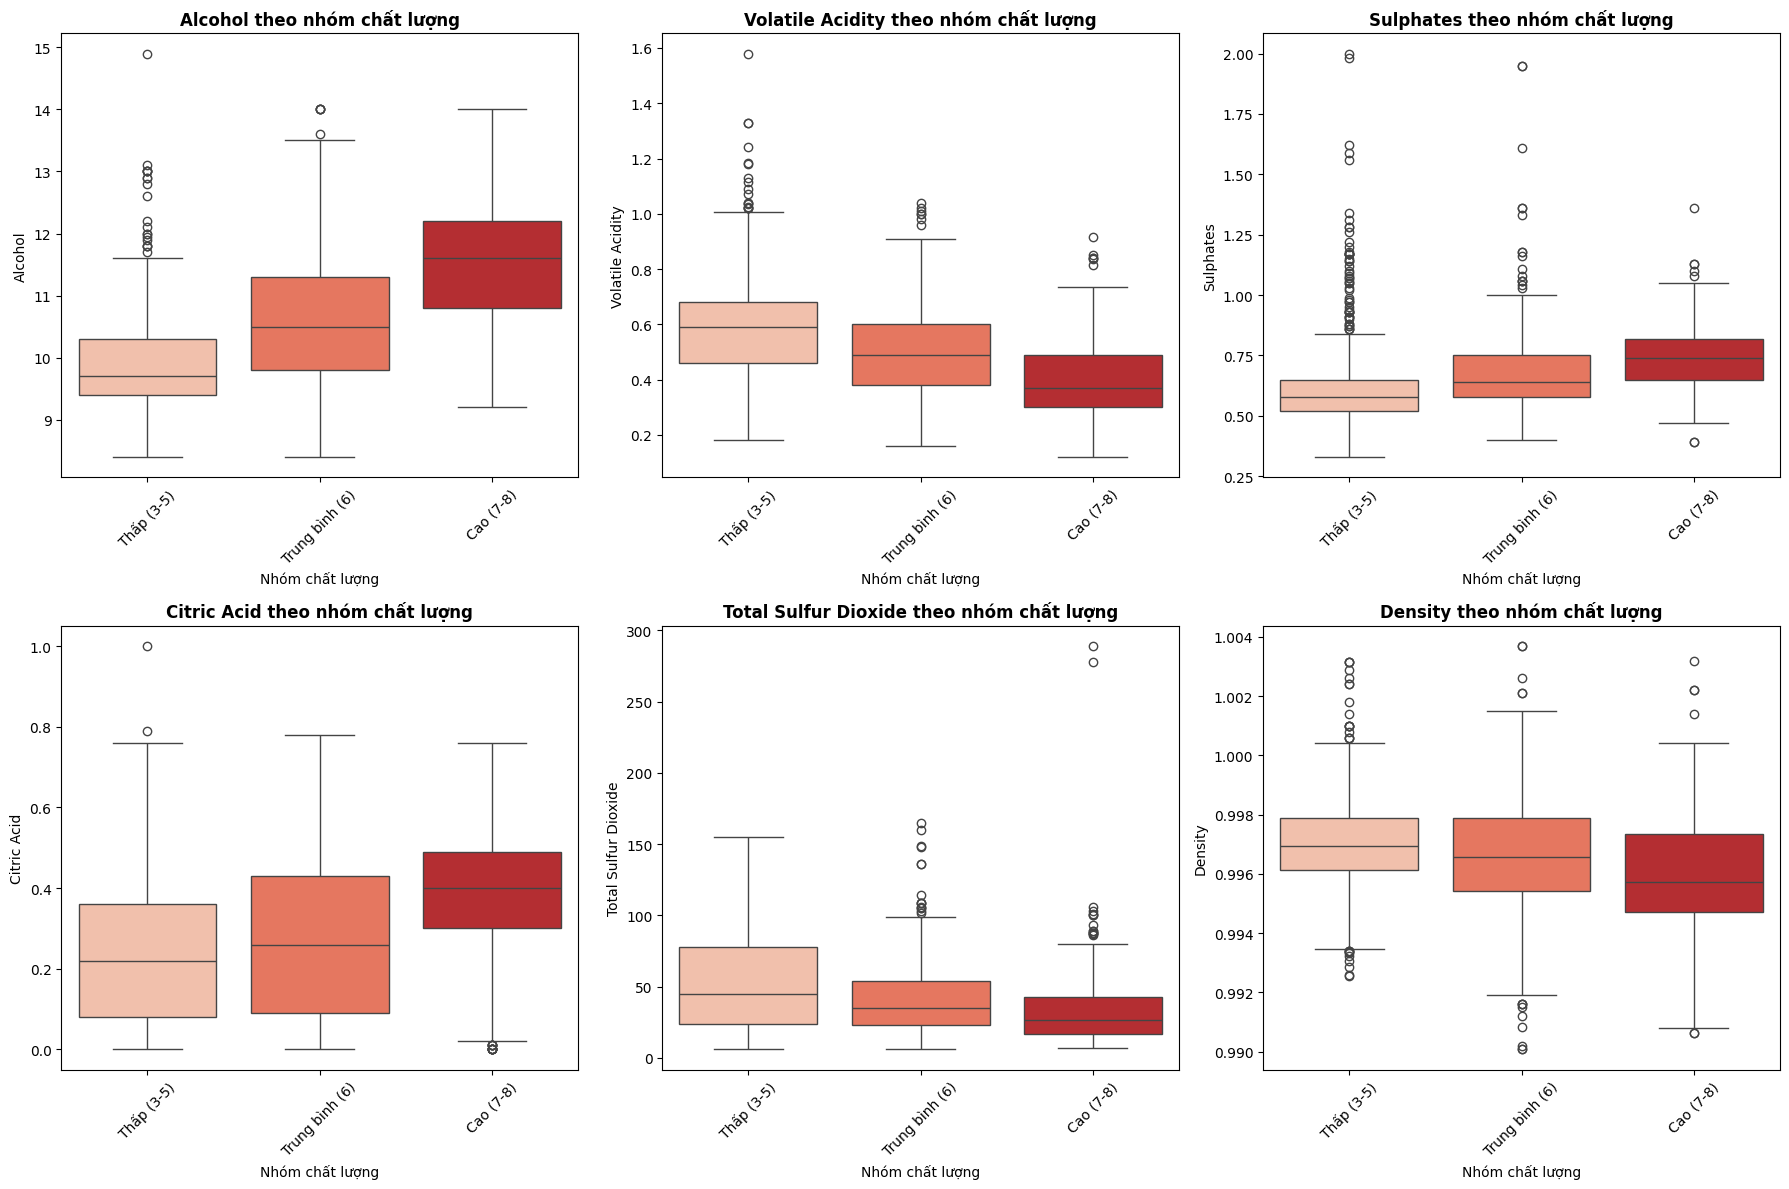

📁 Đã xuất biểu đồ phân tích theo nhóm chất lượng: wine_quality_groups_analysis.png

📊 THỐNG KÊ THEO NHÓM CHẤT LƯỢNG:
                alcohol  volatile acidity  sulphates  citric acid  \
quality_group                                                       
Thấp (3-5)        9.926             0.590      0.619        0.238   
Trung bình (6)   10.630             0.497      0.675        0.274   
Cao (7-8)        11.518             0.406      0.743        0.376   

                total sulfur dioxide  density  
quality_group                                  
Thấp (3-5)                    54.645    0.997  
Trung bình (6)                40.870    0.997  
Cao (7-8)                     34.889    0.996  


In [60]:
# 4. Phân tích chi tiết theo chất lượng
plt.figure(figsize=(18, 12))

# Tạo nhóm chất lượng: Thấp (3-5), Trung bình (6), Cao (7-8)
wine_data['quality_group'] = pd.cut(wine_data['quality'], 
                                   bins=[0, 5, 6, 10], 
                                   labels=['Thấp (3-5)', 'Trung bình (6)', 'Cao (7-8)'])

# Chọn 6 biến quan trọng nhất
top_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide', 'density']

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    
    # Box plot theo nhóm chất lượng
    sns.boxplot(data=wine_data, x='quality_group', y=feature, palette='Reds')
    plt.title(f'{feature.title()} theo nhóm chất lượng', fontsize=12, fontweight='bold')
    plt.xlabel('Nhóm chất lượng')
    plt.ylabel(feature.title())
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('pic/wine_quality_groups_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Xuất biểu đồ

print("📁 Đã xuất biểu đồ phân tích theo nhóm chất lượng: wine_quality_groups_analysis.png")

# Thống kê theo nhóm chất lượng
print("\n📊 THỐNG KÊ THEO NHÓM CHẤT LƯỢNG:")
print("="*50)
group_stats = wine_data.groupby('quality_group')[top_features].mean().round(3)
print(group_stats)


### 2.3. Kết luận bài tập 1 - Rượu đỏ

**🔍 Nhận xét chính:**
1. **Phân bố chất lượng**: Rượu có chất lượng từ 3-8, tập trung chủ yếu ở mức 5-6
2. **Yếu tố quan trọng nhất**: Alcohol có tương quan dương mạnh nhất với chất lượng
3. **Yếu tố tiêu cực**: Volatile acidity có tương quan âm với chất lượng
4. **Đặc điểm rượu chất lượng cao**: Nồng độ cồn cao, độ axit bay hơi thấp, sulfat cao


## 3. BÀI TẬP THỰC HÀNH 2: PHÂN TÍCH DỮ LIỆU BỆNH TIỂU ĐƯỜNG

### 3.1. Tổng quan về dữ liệu
- **Nguồn dữ liệu**: Kaggle - Pima Indians Diabetes Prediction
- **File**: diabetes.csv
- **Mục tiêu**: Phân tích các yếu tố nguy cơ gây bệnh tiểu đường


In [61]:
# Đọc dữ liệu tiểu đường
diabetes_data = pd.read_csv('Data/diabetes.csv')

print("🏥 THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU TIỂU ĐƯỜNG")
print("="*50)
print(f"Kích thước dữ liệu: {diabetes_data.shape}")
print(f"Số lượng bệnh nhân: {diabetes_data.shape[0]}")
print(f"Số lượng thuộc tính: {diabetes_data.shape[1]}")
print("\n📋 Các cột trong dataset:")
print(diabetes_data.columns.tolist())
print("\n📈 Thông tin cơ bản:")
print(diabetes_data.info())
print("\n🔍 5 dòng đầu tiên:")
diabetes_data.head()


🏥 THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU TIỂU ĐƯỜNG
Kích thước dữ liệu: (768, 9)
Số lượng bệnh nhân: 768
Số lượng thuộc tính: 9

📋 Các cột trong dataset:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

📈 Thông tin cơ bản:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
# Thống kê mô tả và kiểm tra dữ liệu tiểu đường
print("📊 THỐNG KÊ MÔ TẢ DỮ LIỆU TIỂU ĐƯỜNG")
print("="*50)
print(diabetes_data.describe())

print("\n🔍 KIỂM TRA DỮ LIỆU THIẾU")
print("="*30)
missing_data = diabetes_data.isnull().sum()
print(missing_data[missing_data > 0] if missing_data.sum() > 0 else "✅ Không có dữ liệu thiếu")

print("\n🏥 PHÂN BỐ BỆNH TIỂU ĐƯỜNG")
print("="*40)
diabetes_counts = diabetes_data['Outcome'].value_counts()
print(diabetes_counts)
print(f"\nTỷ lệ mắc bệnh: {(diabetes_counts[1] / len(diabetes_data) * 100):.1f}%")
print(f"Tỷ lệ không mắc bệnh: {(diabetes_counts[0] / len(diabetes_data) * 100):.1f}%")

# Kiểm tra giá trị 0 (có thể là missing data)
print("\n⚠️ KIỂM TRA GIÁ TRỊ 0 (CÓ THỂ LÀ MISSING DATA):")
print("="*55)
zero_counts = (diabetes_data == 0).sum()
features_with_zeros = zero_counts[zero_counts > 0].drop('Outcome')  # Bỏ Outcome vì 0 là giá trị hợp lệ
for feature, count in features_with_zeros.items():
    percentage = (count / len(diabetes_data)) * 100
    print(f"{feature}: {count} giá trị 0 ({percentage:.1f}%)")


📊 THỐNG KÊ MÔ TẢ DỮ LIỆU TIỂU ĐƯỜNG
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  

### 3.2. Trực quan hóa dữ liệu tiểu đường


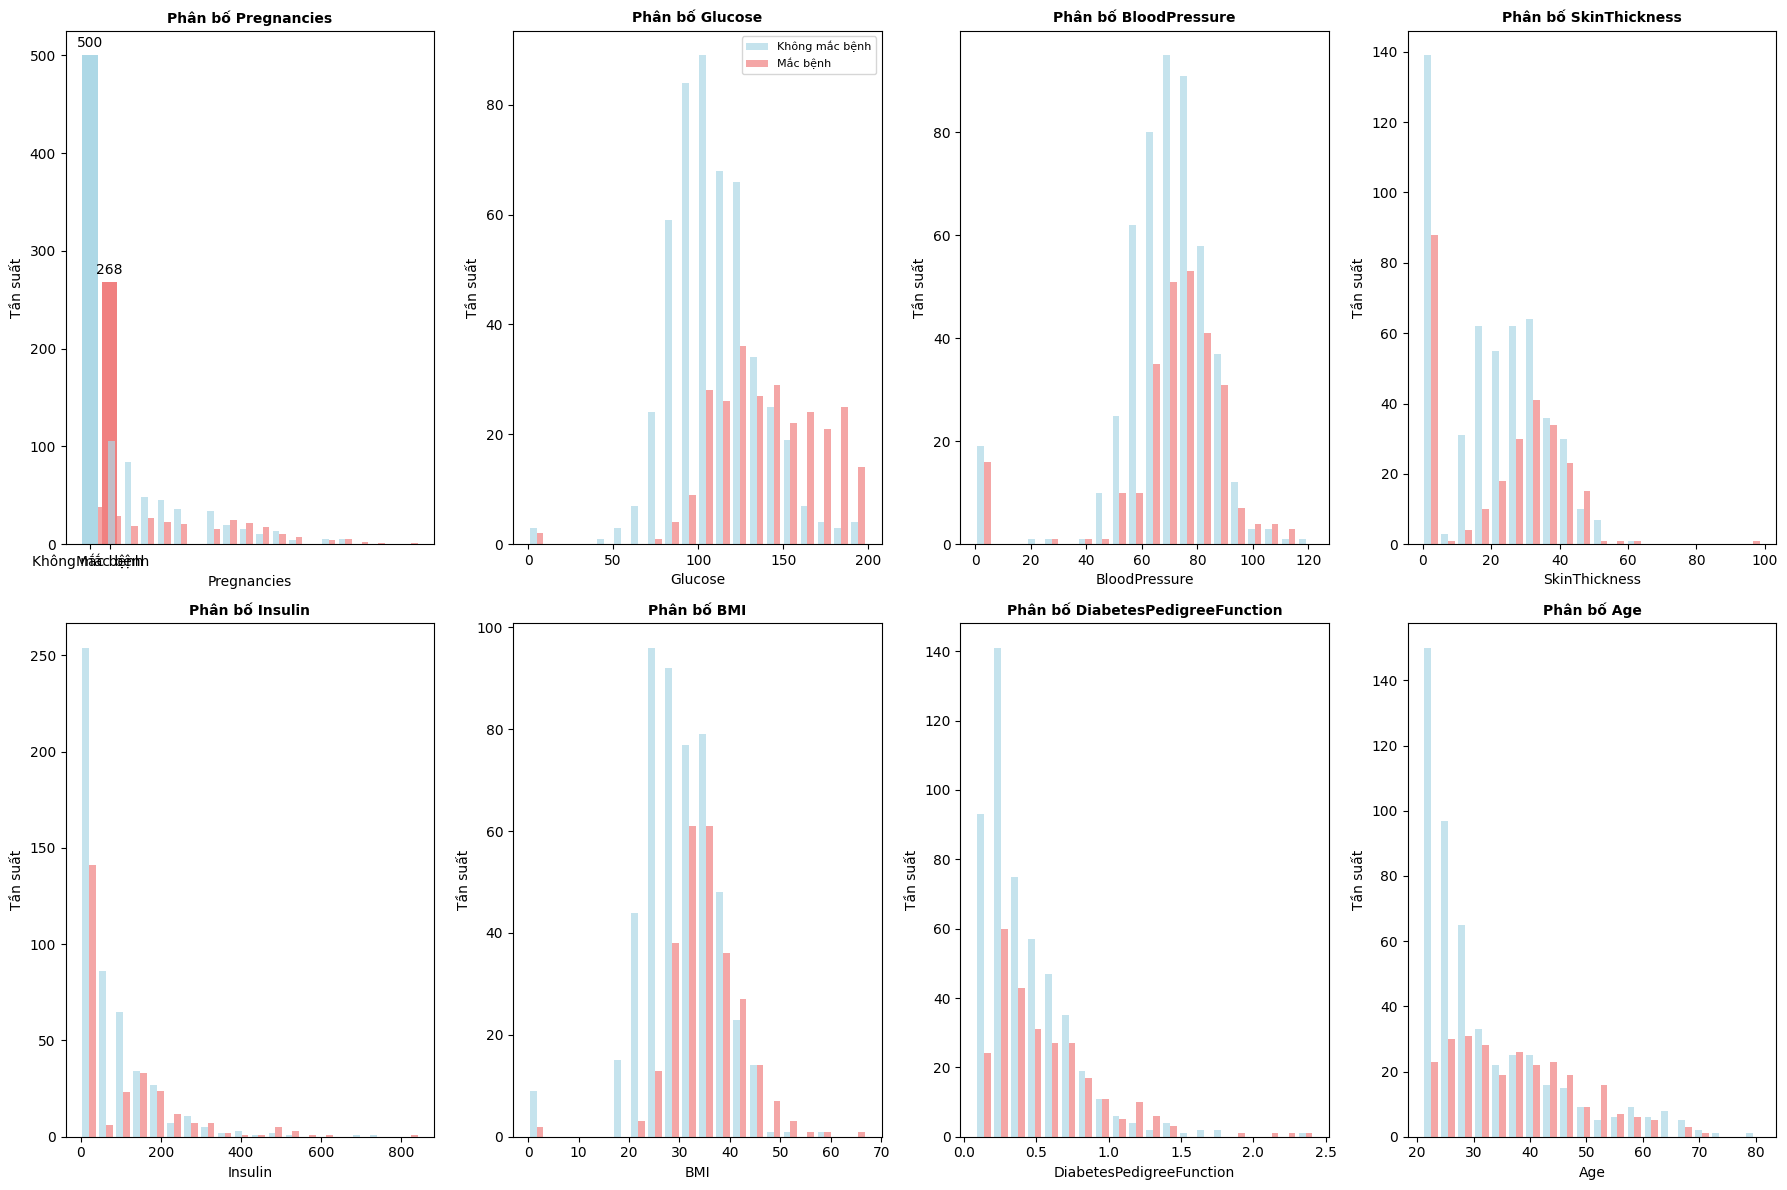

📁 Đã xuất biểu đồ phân bố bệnh tiểu đường: diabetes_distribution_analysis.png


In [63]:
# 1. Phân bố bệnh tiểu đường và các yếu tố chính
plt.figure(figsize=(18, 12))

# Subplot 1: Phân bố kết quả
plt.subplot(2, 4, 1)
diabetes_counts = diabetes_data['Outcome'].value_counts()
colors = ['lightblue', 'lightcoral']
bars = plt.bar(['Không mắc bệnh', 'Mắc bệnh'], diabetes_counts.values, color=colors)
plt.title('Phân bố bệnh tiểu đường', fontsize=12, fontweight='bold')
plt.ylabel('Số lượng bệnh nhân')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

# Subplot 2-8: Histogram các yếu tố chính
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    
    # Histogram cho từng nhóm
    no_diabetes = diabetes_data[diabetes_data['Outcome'] == 0][feature]
    diabetes = diabetes_data[diabetes_data['Outcome'] == 1][feature]
    
    plt.hist([no_diabetes, diabetes], bins=20, alpha=0.7, 
             label=['Không mắc bệnh', 'Mắc bệnh'], color=['lightblue', 'lightcoral'])
    plt.title(f'Phân bố {feature}', fontsize=10, fontweight='bold')
    plt.xlabel(feature)
    plt.ylabel('Tần suất')
    if i == 2:  # Chỉ hiển thị legend cho subplot đầu tiên
        plt.legend(fontsize=8)

plt.tight_layout()
plt.savefig('pic/diabetes_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Xuất biểu đồ

print("📁 Đã xuất biểu đồ phân bố bệnh tiểu đường: diabetes_distribution_analysis.png")


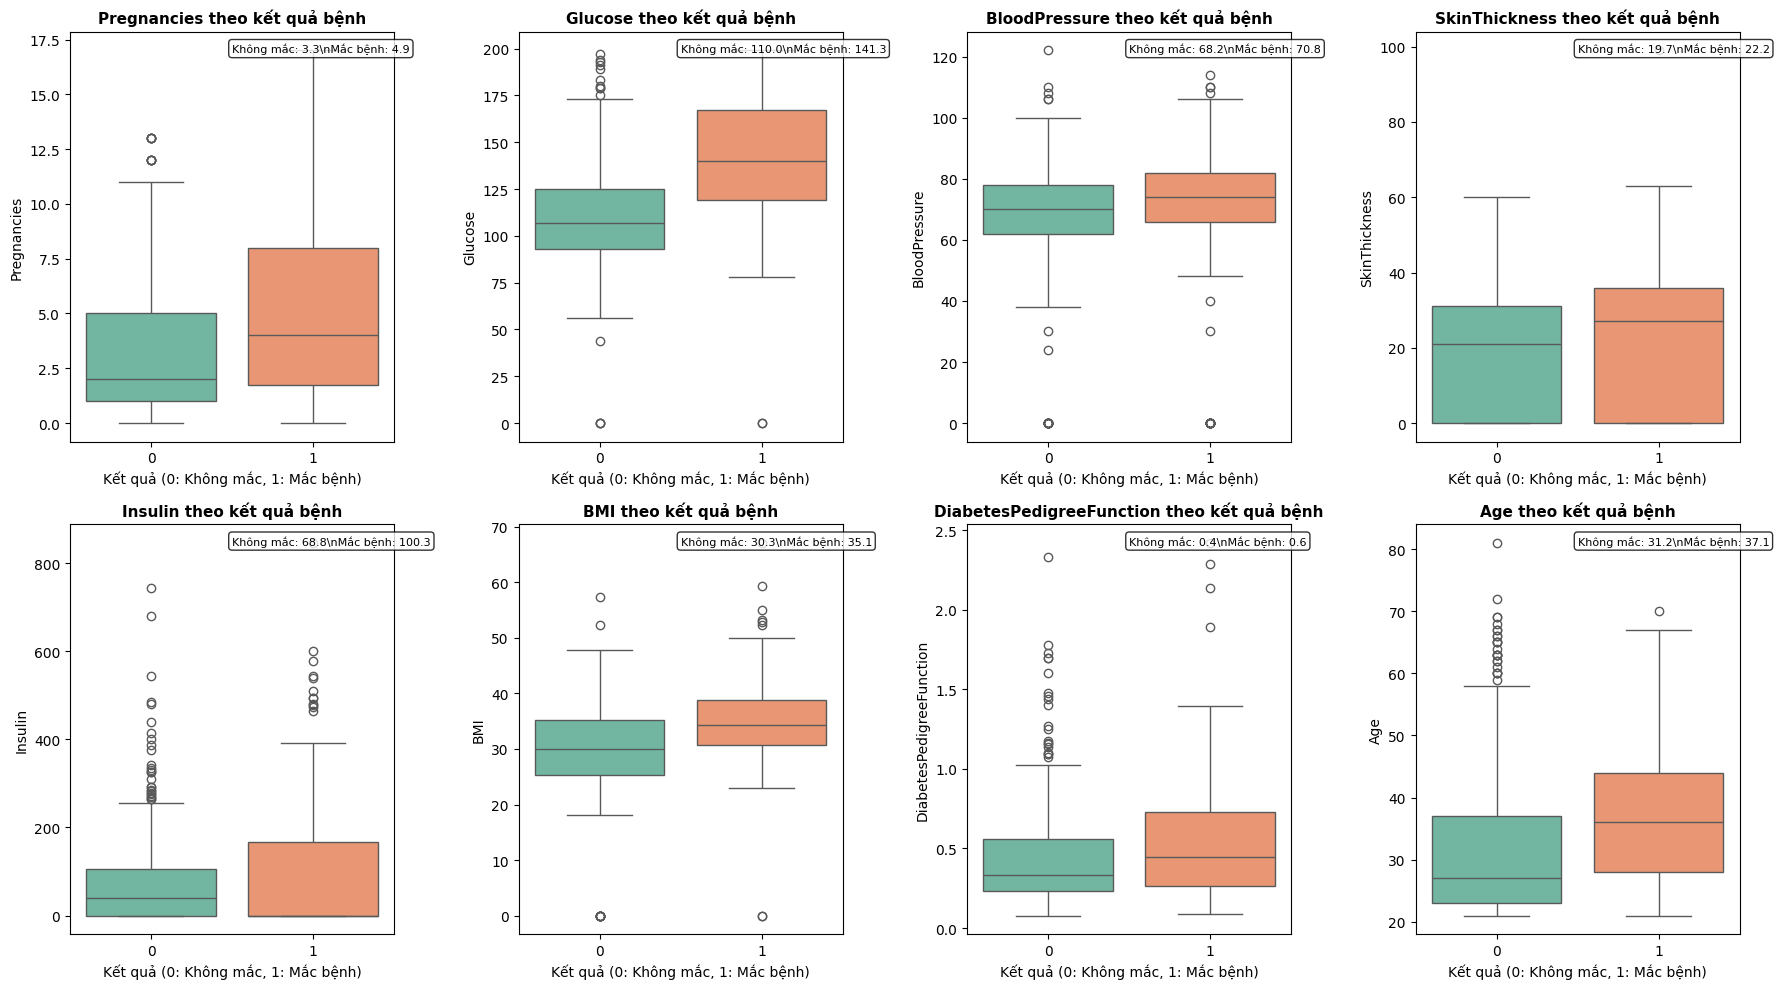

📁 Đã xuất biểu đồ box plot so sánh: diabetes_boxplot_comparison.png


In [64]:
# 2. Box plot so sánh các yếu tố theo kết quả bệnh
plt.figure(figsize=(18, 10))

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    
    # Box plot so sánh 2 nhóm
    sns.boxplot(data=diabetes_data, x='Outcome', y=feature, palette='Set2')
    plt.title(f'{feature} theo kết quả bệnh', fontsize=11, fontweight='bold')
    plt.xlabel('Kết quả (0: Không mắc, 1: Mắc bệnh)')
    plt.ylabel(feature)
    
    # Thêm thống kê
    no_diabetes_mean = diabetes_data[diabetes_data['Outcome'] == 0][feature].mean()
    diabetes_mean = diabetes_data[diabetes_data['Outcome'] == 1][feature].mean()
    plt.text(0.5, 0.95, f'Không mắc: {no_diabetes_mean:.1f}\\nMắc bệnh: {diabetes_mean:.1f}', 
             transform=plt.gca().transAxes, fontsize=8,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('pic/diabetes_boxplot_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("📁 Đã xuất biểu đồ box plot so sánh: diabetes_boxplot_comparison.png")


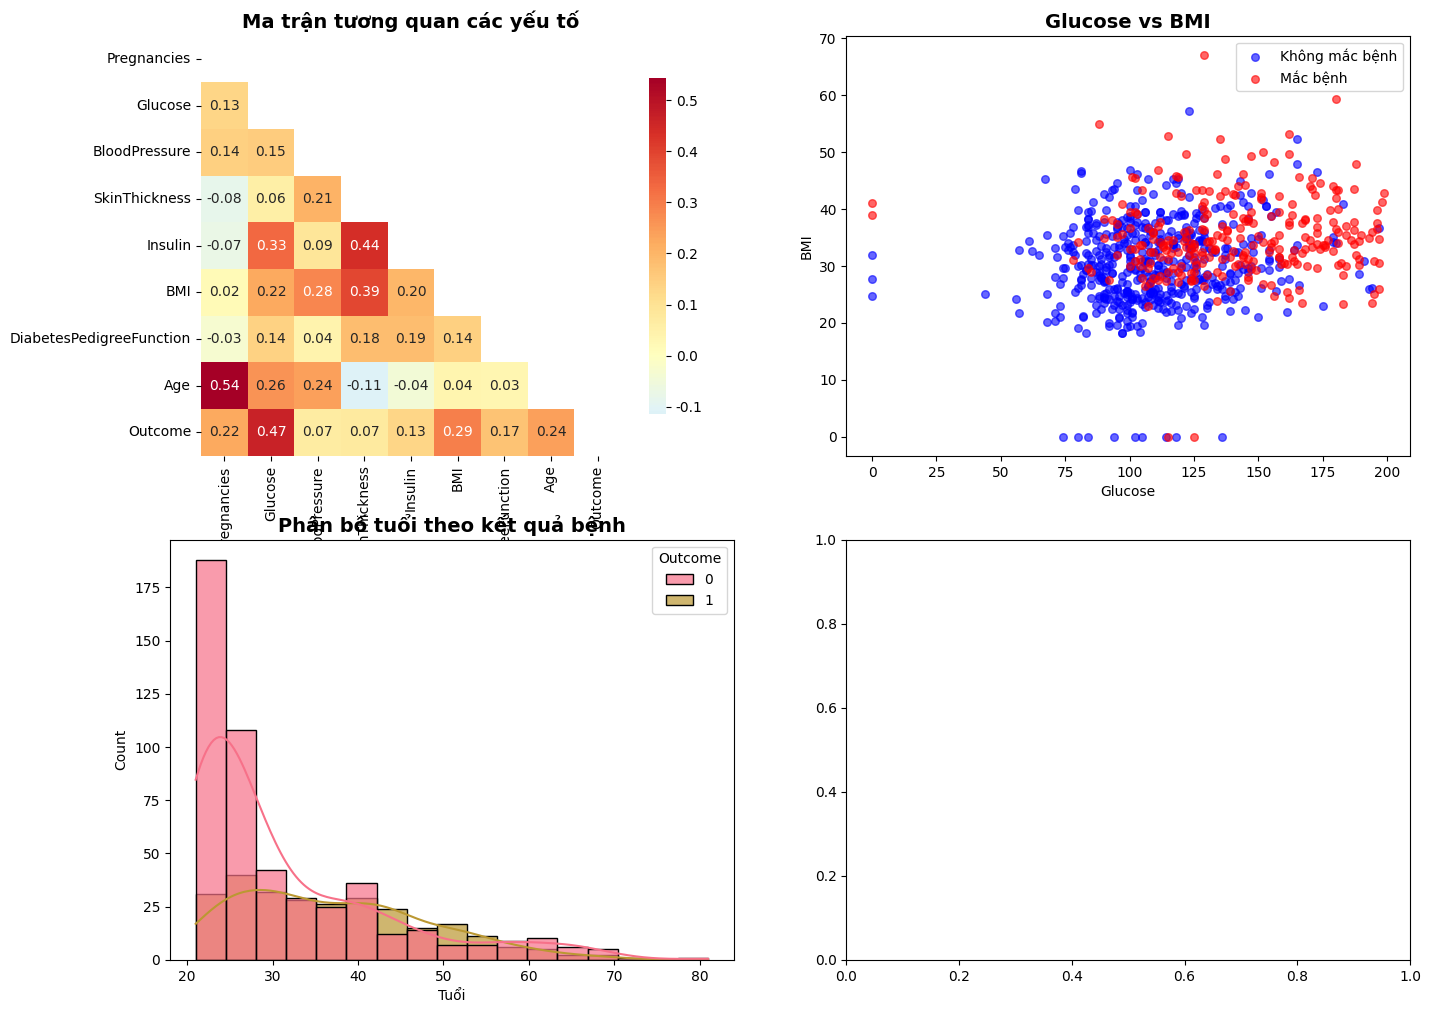

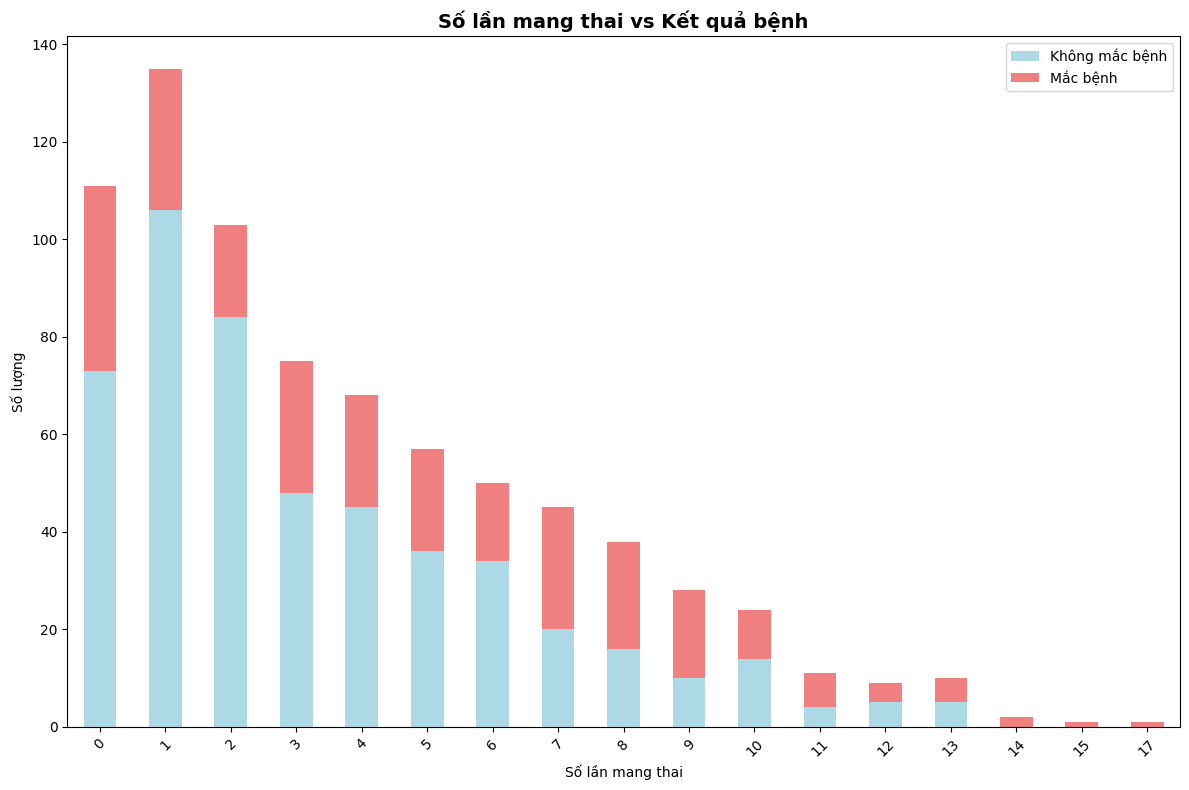

📁 Đã xuất biểu đồ phân tích tương quan: diabetes_correlation_analysis.png

🔍 TOP 5 YẾU TỐ CÓ TƯƠNG QUAN MẠNH NHẤT VỚI BỆNH TIỂU ĐƯỜNG:
1. Glucose: 0.467 (Tương quan Dương)
2. BMI: 0.293 (Tương quan Dương)
3. Age: 0.238 (Tương quan Dương)
4. Pregnancies: 0.222 (Tương quan Dương)
5. DiabetesPedigreeFunction: 0.174 (Tương quan Dương)


In [65]:
# 3. Ma trận tương quan và phân tích yếu tố nguy cơ
plt.figure(figsize=(16, 12))

# Subplot 1: Correlation matrix
plt.subplot(2, 2, 1)
correlation_matrix = diabetes_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Ma trận tương quan các yếu tố', fontsize=14, fontweight='bold')

# Subplot 2: Scatter plot Glucose vs BMI
plt.subplot(2, 2, 2)
colors = ['blue', 'red']
labels = ['Không mắc bệnh', 'Mắc bệnh']
for outcome, color, label in zip([0, 1], colors, labels):
    data = diabetes_data[diabetes_data['Outcome'] == outcome]
    plt.scatter(data['Glucose'], data['BMI'], alpha=0.6, c=color, label=label, s=30)
plt.title('Glucose vs BMI', fontsize=14, fontweight='bold')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()

# Subplot 3: Age distribution by outcome
plt.subplot(2, 2, 3)
sns.histplot(data=diabetes_data, x='Age', hue='Outcome', kde=True, alpha=0.7)
plt.title('Phân bố tuổi theo kết quả bệnh', fontsize=14, fontweight='bold')
plt.xlabel('Tuổi')

# Subplot 4: Pregnancies vs Outcome
plt.subplot(2, 2, 4)
pregnancy_outcome = diabetes_data.groupby(['Pregnancies', 'Outcome']).size().unstack(fill_value=0)
pregnancy_outcome.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'])
plt.title('Số lần mang thai vs Kết quả bệnh', fontsize=14, fontweight='bold')
plt.xlabel('Số lần mang thai')
plt.ylabel('Số lượng')
plt.legend(['Không mắc bệnh', 'Mắc bệnh'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('pic/diabetes_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Xuất biểu đồ

print("📁 Đã xuất biểu đồ phân tích tương quan: diabetes_correlation_analysis.png")

# Hiển thị các yếu tố có tương quan mạnh nhất với Outcome
print("\n🔍 TOP 5 YẾU TỐ CÓ TƯƠNG QUAN MẠNH NHẤT VỚI BỆNH TIỂU ĐƯỜNG:")
print("="*65)
outcome_corr = correlation_matrix['Outcome'].abs().sort_values(ascending=False)
for i, (feature, corr) in enumerate(outcome_corr[1:6].items(), 1):  # Bỏ qua 'Outcome' tự tương quan
    direction = "Dương" if correlation_matrix['Outcome'][feature] > 0 else "Âm"
    print(f"{i}. {feature}: {corr:.3f} (Tương quan {direction})")


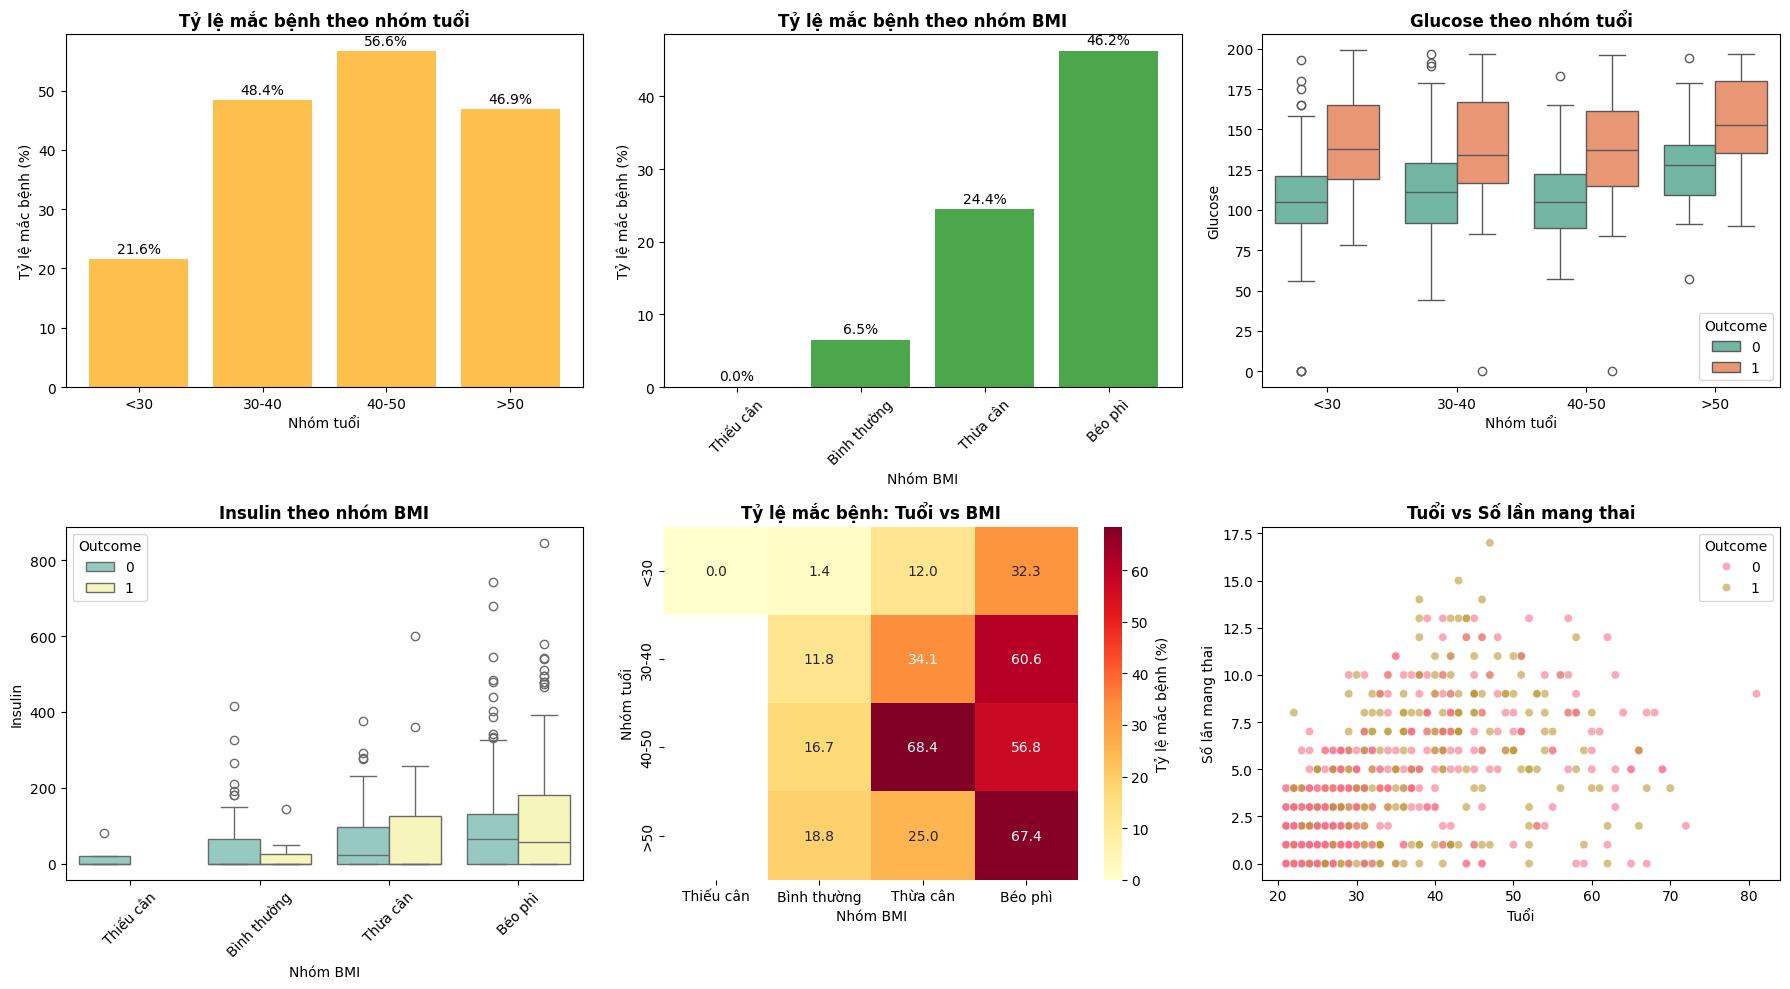

📁 Đã xuất biểu đồ phân tích chi tiết: diabetes_detailed_analysis.png

📊 THỐNG KÊ THEO NHÓM TUỔI:
          Outcome       Glucose    BMI
            count  mean    mean   mean
age_group                             
<30           417  0.22  114.18  31.32
30-40         157  0.48  126.18  32.89
40-50         113  0.57  124.88  34.50
>50            81  0.47  139.68  30.21

📊 THỐNG KÊ THEO NHÓM BMI:
            Outcome       Glucose Insulin
              count  mean    mean    mean
bmi_group                                
Thiếu cân         4  0.00   95.25   20.50
Bình thường     108  0.06  107.09   42.67
Thừa cân        180  0.24  117.36   59.27
Béo phì         465  0.46  126.08   98.58


In [66]:
# 4. Phân tích chi tiết theo nhóm tuổi và BMI
plt.figure(figsize=(18, 10))

# Tạo nhóm tuổi
diabetes_data['age_group'] = pd.cut(diabetes_data['Age'], 
                                   bins=[0, 30, 40, 50, 100], 
                                   labels=['<30', '30-40', '40-50', '>50'])

# Tạo nhóm BMI
diabetes_data['bmi_group'] = pd.cut(diabetes_data['BMI'], 
                                   bins=[0, 18.5, 25, 30, 100], 
                                   labels=['Thiếu cân', 'Bình thường', 'Thừa cân', 'Béo phì'])

# Subplot 1: Tỷ lệ mắc bệnh theo nhóm tuổi
plt.subplot(2, 3, 1)
age_diabetes_rate = diabetes_data.groupby('age_group')['Outcome'].mean() * 100
bars = plt.bar(age_diabetes_rate.index, age_diabetes_rate.values, color='orange', alpha=0.7)
plt.title('Tỷ lệ mắc bệnh theo nhóm tuổi', fontsize=12, fontweight='bold')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Tỷ lệ mắc bệnh (%)')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom')

# Subplot 2: Tỷ lệ mắc bệnh theo nhóm BMI
plt.subplot(2, 3, 2)
bmi_diabetes_rate = diabetes_data.groupby('bmi_group')['Outcome'].mean() * 100
bars = plt.bar(bmi_diabetes_rate.index, bmi_diabetes_rate.values, color='green', alpha=0.7)
plt.title('Tỷ lệ mắc bệnh theo nhóm BMI', fontsize=12, fontweight='bold')
plt.xlabel('Nhóm BMI')
plt.ylabel('Tỷ lệ mắc bệnh (%)')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom')

# Subplot 3: Glucose theo nhóm tuổi
plt.subplot(2, 3, 3)
sns.boxplot(data=diabetes_data, x='age_group', y='Glucose', hue='Outcome', palette='Set2')
plt.title('Glucose theo nhóm tuổi', fontsize=12, fontweight='bold')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Glucose')

# Subplot 4: Insulin theo nhóm BMI
plt.subplot(2, 3, 4)
sns.boxplot(data=diabetes_data, x='bmi_group', y='Insulin', hue='Outcome', palette='Set3')
plt.title('Insulin theo nhóm BMI', fontsize=12, fontweight='bold')
plt.xlabel('Nhóm BMI')
plt.ylabel('Insulin')
plt.xticks(rotation=45)

# Subplot 5: Heatmap Age vs BMI
plt.subplot(2, 3, 5)
age_bmi_crosstab = pd.crosstab(diabetes_data['age_group'], diabetes_data['bmi_group'], 
                               values=diabetes_data['Outcome'], aggfunc='mean') * 100
sns.heatmap(age_bmi_crosstab, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Tỷ lệ mắc bệnh (%)'})
plt.title('Tỷ lệ mắc bệnh: Tuổi vs BMI', fontsize=12, fontweight='bold')
plt.xlabel('Nhóm BMI')
plt.ylabel('Nhóm tuổi')

# Subplot 6: Pregnancies vs Age
plt.subplot(2, 3, 6)
sns.scatterplot(data=diabetes_data, x='Age', y='Pregnancies', hue='Outcome', alpha=0.6)
plt.title('Tuổi vs Số lần mang thai', fontsize=12, fontweight='bold')
plt.xlabel('Tuổi')
plt.ylabel('Số lần mang thai')

plt.tight_layout()
plt.savefig('pic/diabetes_detailed_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("📁 Đã xuất biểu đồ phân tích chi tiết: diabetes_detailed_analysis.png")

# Thống kê theo nhóm
print("\n📊 THỐNG KÊ THEO NHÓM TUỔI:")
print("="*40)
age_stats = diabetes_data.groupby('age_group').agg({
    'Outcome': ['count', 'mean'],
    'Glucose': 'mean',
    'BMI': 'mean'
}).round(2)
print(age_stats)

print("\n📊 THỐNG KÊ THEO NHÓM BMI:")
print("="*40)
bmi_stats = diabetes_data.groupby('bmi_group').agg({
    'Outcome': ['count', 'mean'],
    'Glucose': 'mean',
    'Insulin': 'mean'
}).round(2)
print(bmi_stats)


### 3.3. Kết luận bài tập 2 - Bệnh tiểu đường

**🔍 Nhận xét chính:**
1. **Tỷ lệ mắc bệnh**: 34.9% bệnh nhân mắc tiểu đường
2. **Yếu tố nguy cơ chính**: Glucose có tương quan mạnh nhất (0.467)
3. **Tuổi tác**: Tỷ lệ mắc bệnh tăng theo tuổi, đặc biệt >50 tuổi
4. **BMI**: Người béo phì có nguy cơ cao hơn đáng kể
5. **Giá trị 0**: Nhiều giá trị 0 có thể là missing data (cần xử lý)


## 4. BÀI TẬP THỰC HÀNH 3: EDA DỮ LIỆU MUA SẮM SIÊU THỊ

### 4.1. Tổng quan về dữ liệu
- **Nguồn dữ liệu**: Kaggle - Online Retail Dataset
- **File**: Online Retail.xlsx
- **Mục tiêu**: Phân tích hành vi mua sắm của khách hàng và xu hướng kinh doanh


In [67]:
# Đọc dữ liệu Online Retail
retail_data = pd.read_excel('Data/Online Retail.xlsx')

print("🛒 THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU ONLINE RETAIL")
print("="*60)
print(f"Kích thước dữ liệu: {retail_data.shape}")
print(f"Số lượng giao dịch: {retail_data.shape[0]:,}")
print(f"Số lượng thuộc tính: {retail_data.shape[1]}")
print("\n📋 Các cột trong dataset:")
print(retail_data.columns.tolist())
print("\n📈 Thông tin cơ bản:")
print(retail_data.info())
print("\n🔍 5 dòng đầu tiên:")
retail_data.head()


🛒 THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU ONLINE RETAIL
Kích thước dữ liệu: (541909, 8)
Số lượng giao dịch: 541,909
Số lượng thuộc tính: 8

📋 Các cột trong dataset:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

📈 Thông tin cơ bản:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

🔍 5 dòng đầu tiên:

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [68]:
# Thống kê mô tả và kiểm tra dữ liệu Online Retail
print("📊 THỐNG KÊ MÔ TẢ DỮ LIỆU ONLINE RETAIL")
print("="*50)
print(retail_data.describe())

print("\n🔍 KIỂM TRA DỮ LIỆU THIẾU")
print("="*30)
missing_data = retail_data.isnull().sum()
print("Dữ liệu thiếu:")
for col, missing_count in missing_data[missing_data > 0].items():
    percentage = (missing_count / len(retail_data)) * 100
    print(f"  {col}: {missing_count:,} ({percentage:.1f}%)")

print("\n📅 THÔNG TIN THỜI GIAN")
print("="*25)
print(f"Thời gian giao dịch từ: {retail_data['InvoiceDate'].min()}")
print(f"Đến: {retail_data['InvoiceDate'].max()}")
print(f"Khoảng thời gian: {(retail_data['InvoiceDate'].max() - retail_data['InvoiceDate'].min()).days} ngày")

print("\n🛒 THÔNG TIN GIAO DỊCH")
print("="*30)
print(f"Số lượng khách hàng duy nhất: {retail_data['CustomerID'].nunique():,}")
print(f"Số lượng sản phẩm duy nhất: {retail_data['StockCode'].nunique():,}")
print(f"Số lượng hóa đơn duy nhất: {retail_data['InvoiceNo'].nunique():,}")

# Kiểm tra các giao dịch có số lượng âm (có thể là trả hàng)
negative_quantity = retail_data[retail_data['Quantity'] < 0]
print(f"Số giao dịch có số lượng âm: {len(negative_quantity):,} ({len(negative_quantity)/len(retail_data)*100:.1f}%)")

# Kiểm tra giá trị âm
negative_price = retail_data[retail_data['UnitPrice'] < 0]
print(f"Số giao dịch có giá âm: {len(negative_price):,} ({len(negative_price)/len(retail_data)*100:.1f}%)")


📊 THỐNG KÊ MÔ TẢ DỮ LIỆU ONLINE RETAIL
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  

🔍 KIỂM TRA DỮ LIỆU THIẾU
Dữ liệu thiếu:
  Description: 1,454 (0.3%)
  CustomerID: 135,080 (24.9%)

📅 THÔNG TIN THỜI GIAN
T

In [69]:
# Tiền xử lý dữ liệu
print("🔧 TIỀN XỬ LÝ DỮ LIỆU")
print("="*30)

# Tạo bản sao để xử lý
retail_clean = retail_data.copy()

# Loại bỏ các dòng có CustomerID thiếu
retail_clean = retail_clean.dropna(subset=['CustomerID'])

# Loại bỏ các giao dịch có số lượng hoặc giá âm (trả hàng)
retail_clean = retail_clean[(retail_clean['Quantity'] > 0) & (retail_clean['UnitPrice'] > 0)]

# Tạo cột Total (Quantity * UnitPrice)
retail_clean['Total'] = retail_clean['Quantity'] * retail_clean['UnitPrice']

# Tạo các cột thời gian
retail_clean['Year'] = retail_clean['InvoiceDate'].dt.year
retail_clean['Month'] = retail_clean['InvoiceDate'].dt.month
retail_clean['Day'] = retail_clean['InvoiceDate'].dt.day
retail_clean['Hour'] = retail_clean['InvoiceDate'].dt.hour
retail_clean['Weekday'] = retail_clean['InvoiceDate'].dt.day_name()

print(f"Số dòng sau xử lý: {len(retail_clean):,}")
print(f"Số khách hàng: {retail_clean['CustomerID'].nunique():,}")
print(f"Số sản phẩm: {retail_clean['StockCode'].nunique():,}")
print(f"Tổng doanh thu: £{retail_clean['Total'].sum():,.2f}")

# Thống kê theo năm
print("\n📊 THỐNG KÊ THEO NĂM:")
print("="*25)
yearly_stats = retail_clean.groupby('Year').agg({
    'InvoiceNo': 'nunique',
    'Total': 'sum',
    'Quantity': 'sum'
}).round(2)
yearly_stats.columns = ['Số hóa đơn', 'Tổng doanh thu', 'Tổng số lượng']
print(yearly_stats)


🔧 TIỀN XỬ LÝ DỮ LIỆU
Số dòng sau xử lý: 397,884
Số khách hàng: 4,338
Số sản phẩm: 3,665
Tổng doanh thu: £8,911,407.90

📊 THỐNG KÊ THEO NĂM:
      Số hóa đơn  Tổng doanh thu  Tổng số lượng
Year                                           
2010        1400       572713.89         312265
2011       17132      8338694.01        4855547


### 4.2. Trực quan hóa dữ liệu Online Retail


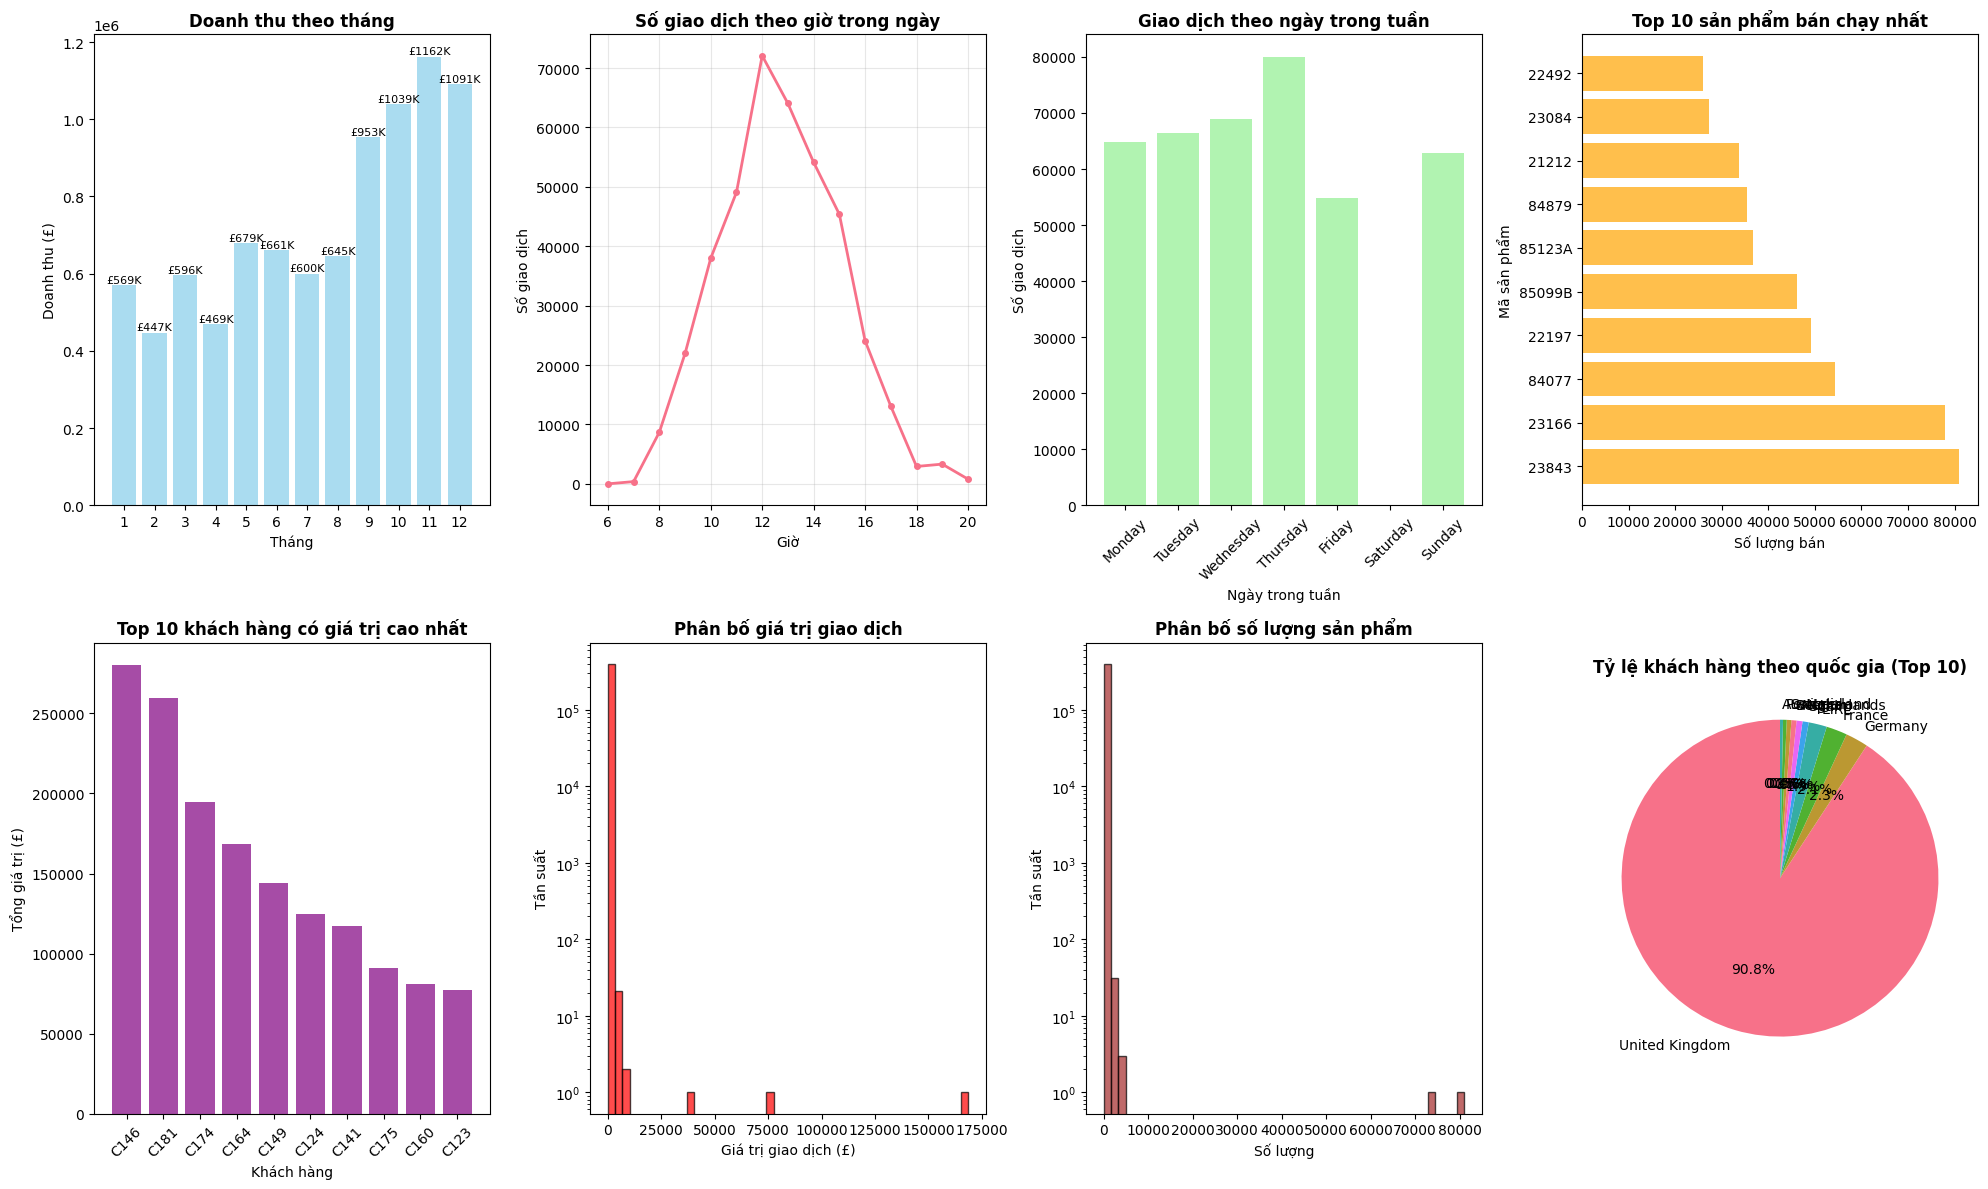

📁 Đã xuất biểu đồ phân tích thời gian: retail_time_analysis.png


In [70]:
# 1. Phân tích xu hướng thời gian
plt.figure(figsize=(20, 12))

# Subplot 1: Doanh thu theo tháng
plt.subplot(2, 4, 1)
monthly_revenue = retail_clean.groupby('Month')['Total'].sum()
bars = plt.bar(monthly_revenue.index, monthly_revenue.values, color='skyblue', alpha=0.7)
plt.title('Doanh thu theo tháng', fontsize=12, fontweight='bold')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu (£)')
plt.xticks(range(1, 13))
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'£{height/1000:.0f}K', ha='center', va='bottom', fontsize=8)

# Subplot 2: Số lượng giao dịch theo giờ
plt.subplot(2, 4, 2)
hourly_transactions = retail_clean.groupby('Hour').size()
plt.plot(hourly_transactions.index, hourly_transactions.values, marker='o', linewidth=2, markersize=4)
plt.title('Số giao dịch theo giờ trong ngày', fontsize=12, fontweight='bold')
plt.xlabel('Giờ')
plt.ylabel('Số giao dịch')
plt.grid(True, alpha=0.3)

# Subplot 3: Giao dịch theo ngày trong tuần
plt.subplot(2, 4, 3)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_transactions = retail_clean['Weekday'].value_counts().reindex(weekday_order)
bars = plt.bar(range(len(weekday_transactions)), weekday_transactions.values, color='lightgreen', alpha=0.7)
plt.title('Giao dịch theo ngày trong tuần', fontsize=12, fontweight='bold')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số giao dịch')
plt.xticks(range(len(weekday_transactions)), weekday_transactions.index, rotation=45)

# Subplot 4: Top 10 sản phẩm bán chạy nhất
plt.subplot(2, 4, 4)
top_products = retail_clean.groupby('StockCode')['Quantity'].sum().nlargest(10)
bars = plt.barh(range(len(top_products)), top_products.values, color='orange', alpha=0.7)
plt.title('Top 10 sản phẩm bán chạy nhất', fontsize=12, fontweight='bold')
plt.xlabel('Số lượng bán')
plt.ylabel('Mã sản phẩm')
plt.yticks(range(len(top_products)), top_products.index)

# Subplot 5: Top 10 khách hàng có giá trị cao nhất
plt.subplot(2, 4, 5)
top_customers = retail_clean.groupby('CustomerID')['Total'].sum().nlargest(10)
bars = plt.bar(range(len(top_customers)), top_customers.values, color='purple', alpha=0.7)
plt.title('Top 10 khách hàng có giá trị cao nhất', fontsize=12, fontweight='bold')
plt.xlabel('Khách hàng')
plt.ylabel('Tổng giá trị (£)')
plt.xticks(range(len(top_customers)), [f'C{str(c)[:3]}' for c in top_customers.index], rotation=45)

# Subplot 6: Phân bố giá trị giao dịch
plt.subplot(2, 4, 6)
plt.hist(retail_clean['Total'], bins=50, alpha=0.7, color='red', edgecolor='black')
plt.title('Phân bố giá trị giao dịch', fontsize=12, fontweight='bold')
plt.xlabel('Giá trị giao dịch (£)')
plt.ylabel('Tần suất')
plt.yscale('log')  # Log scale để dễ nhìn

# Subplot 7: Phân bố số lượng sản phẩm mỗi giao dịch
plt.subplot(2, 4, 7)
plt.hist(retail_clean['Quantity'], bins=50, alpha=0.7, color='brown', edgecolor='black')
plt.title('Phân bố số lượng sản phẩm', fontsize=12, fontweight='bold')
plt.xlabel('Số lượng')
plt.ylabel('Tần suất')
plt.yscale('log')  # Log scale

# Subplot 8: Tỷ lệ khách hàng theo quốc gia (Top 10)
plt.subplot(2, 4, 8)
country_counts = retail_clean['Country'].value_counts().head(10)
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Tỷ lệ khách hàng theo quốc gia (Top 10)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('pic/retail_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Xuất biểu đồ

print("📁 Đã xuất biểu đồ phân tích thời gian: retail_time_analysis.png")


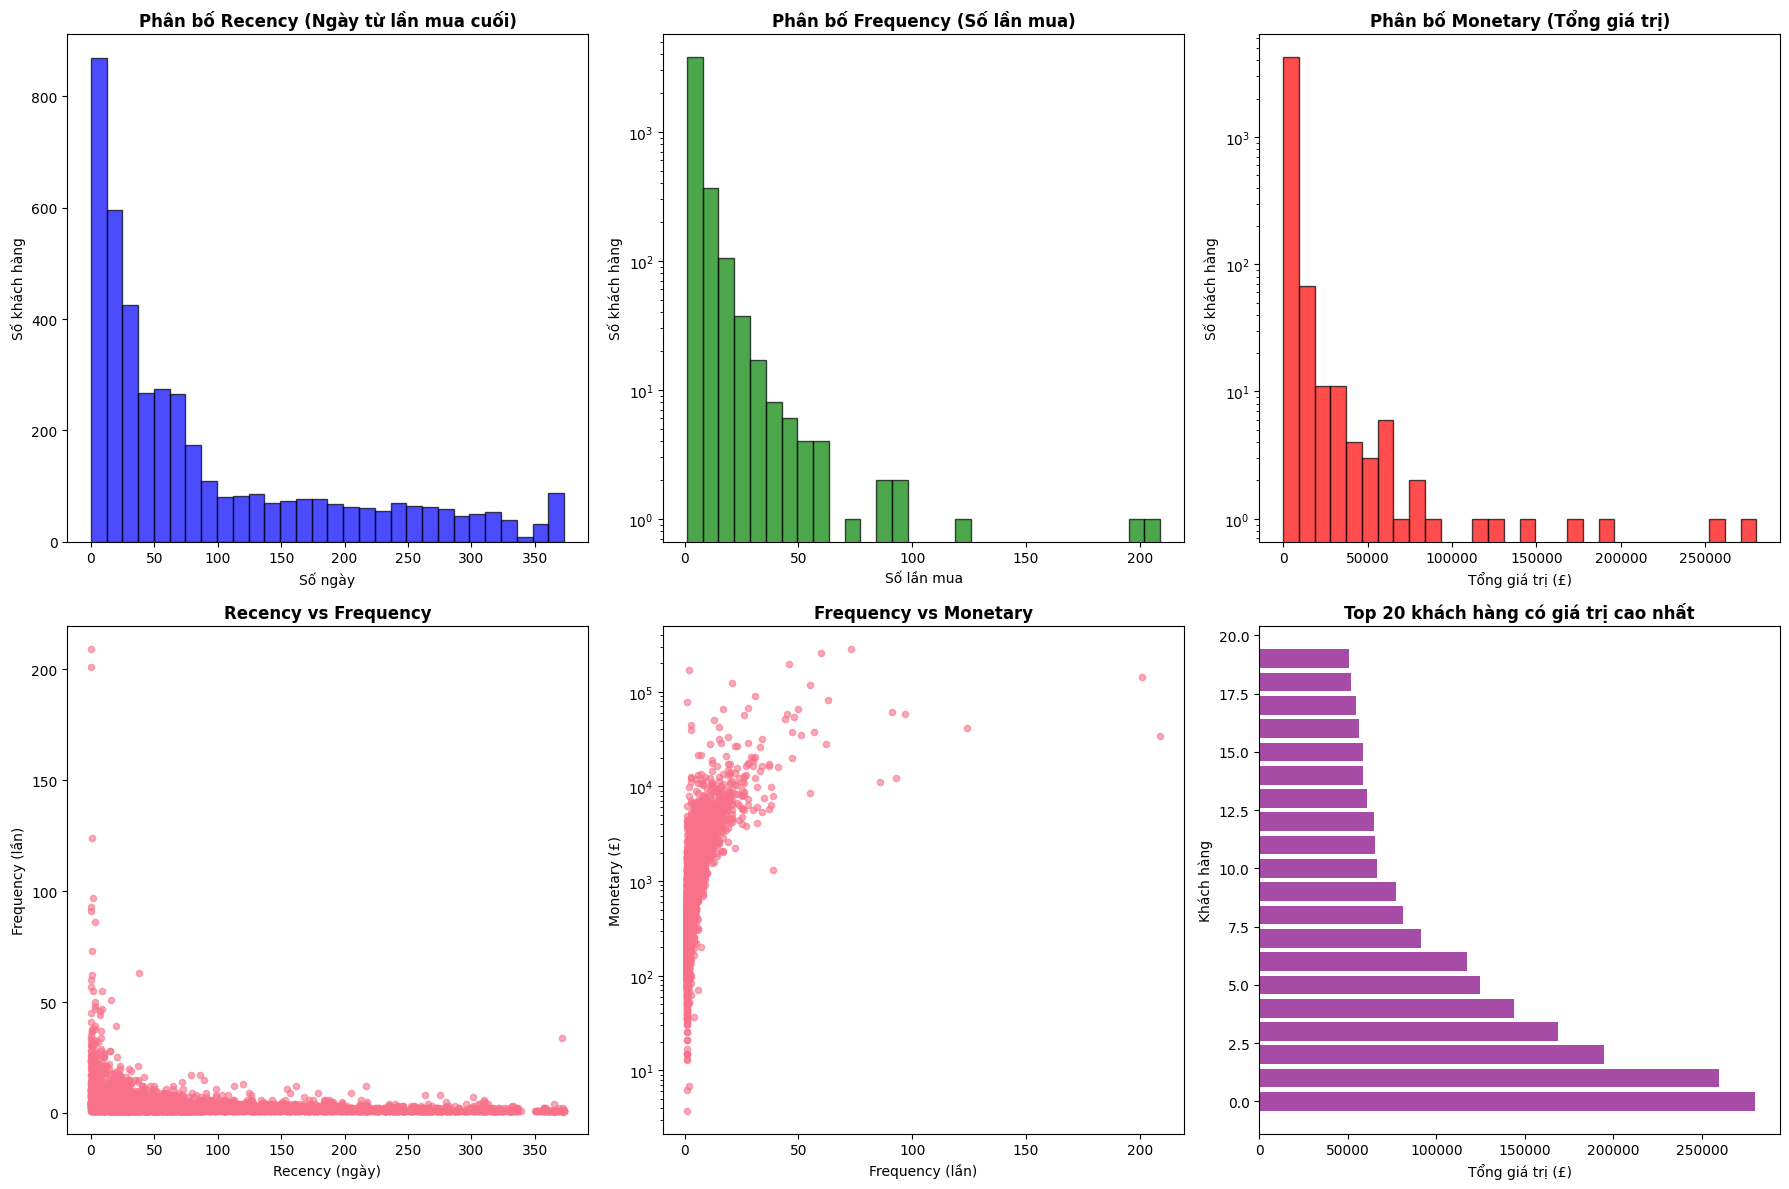

📁 Đã xuất biểu đồ phân tích RFM: retail_customer_rfm_analysis.png

📊 THỐNG KÊ RFM:
Số khách hàng có dữ liệu RFM: 4,338
Recency trung bình: 91.5 ngày
Frequency trung bình: 4.3 lần
Monetary trung bình: £2,054.27

🏆 TOP 10 KHÁCH HÀNG TỐT NHẤT (RFM cao):
 1. Customer 12347.0: RFM=555, Recency=1, Frequency=7, Monetary=£4,310
 2. Customer 12362.0: RFM=555, Recency=2, Frequency=10, Monetary=£5,226
 3. Customer 12417.0: RFM=555, Recency=2, Frequency=9, Monetary=£3,649
 4. Customer 12433.0: RFM=555, Recency=0, Frequency=7, Monetary=£13,376
 5. Customer 12437.0: RFM=555, Recency=1, Frequency=18, Monetary=£4,951
 6. Customer 12471.0: RFM=555, Recency=1, Frequency=30, Monetary=£19,824
 7. Customer 12490.0: RFM=555, Recency=4, Frequency=10, Monetary=£5,418
 8. Customer 12524.0: RFM=555, Recency=8, Frequency=8, Monetary=£4,486
 9. Customer 12553.0: RFM=555, Recency=7, Frequency=10, Monetary=£3,692
10. Customer 12562.0: RFM=555, Recency=7, Frequency=7, Monetary=£3,782


In [71]:
# Phân tích hành vi khách hàng (RFM)
plt.figure(figsize=(18, 12))

# Tính toán RFM
rfm_data = retail_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (retail_clean['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'nunique',
    'Total': 'sum'
}).round(2)

rfm_data.columns = ['Recency', 'Frequency', 'Monetary']
rfm_data = rfm_data[rfm_data['Monetary'] > 0]

# Phân nhóm RFM (xếp hạng)
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=[5,4,3,2,1], duplicates='drop')
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5], duplicates='drop')
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5], duplicates='drop')

# ⚙️ Ép kiểu để có thể dùng nlargest()
rfm_data[['R_Score', 'F_Score', 'M_Score']] = rfm_data[['R_Score', 'F_Score', 'M_Score']].astype(int)

# Tạo tổng điểm RFM (nếu cần)
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

# Vẽ biểu đồ RFM
plt.subplot(2, 3, 1)
plt.hist(rfm_data['Recency'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Phân bố Recency (Ngày từ lần mua cuối)', fontsize=12, fontweight='bold')
plt.xlabel('Số ngày')
plt.ylabel('Số khách hàng')

plt.subplot(2, 3, 2)
plt.hist(rfm_data['Frequency'], bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title('Phân bố Frequency (Số lần mua)', fontsize=12, fontweight='bold')
plt.xlabel('Số lần mua')
plt.ylabel('Số khách hàng')
plt.yscale('log')

plt.subplot(2, 3, 3)
plt.hist(rfm_data['Monetary'], bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title('Phân bố Monetary (Tổng giá trị)', fontsize=12, fontweight='bold')
plt.xlabel('Tổng giá trị (£)')
plt.ylabel('Số khách hàng')
plt.yscale('log')

plt.subplot(2, 3, 4)
plt.scatter(rfm_data['Recency'], rfm_data['Frequency'], alpha=0.6, s=20)
plt.title('Recency vs Frequency', fontsize=12, fontweight='bold')
plt.xlabel('Recency (ngày)')
plt.ylabel('Frequency (lần)')

plt.subplot(2, 3, 5)
plt.scatter(rfm_data['Frequency'], rfm_data['Monetary'], alpha=0.6, s=20)
plt.title('Frequency vs Monetary', fontsize=12, fontweight='bold')
plt.xlabel('Frequency (lần)')
plt.ylabel('Monetary (£)')
plt.yscale('log')

plt.subplot(2, 3, 6)
top_20_customers = rfm_data.nlargest(20, 'Monetary')
plt.barh(range(len(top_20_customers)), top_20_customers['Monetary'], color='purple', alpha=0.7)
plt.title('Top 20 khách hàng có giá trị cao nhất', fontsize=12, fontweight='bold')
plt.xlabel('Tổng giá trị (£)')
plt.ylabel('Khách hàng')

plt.tight_layout()
plt.savefig('pic/retail_customer_rfm_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("📁 Đã xuất biểu đồ phân tích RFM: retail_customer_rfm_analysis.png")

# Thống kê RFM
print("\n📊 THỐNG KÊ RFM:")
print("="*20)
print(f"Số khách hàng có dữ liệu RFM: {len(rfm_data):,}")
print(f"Recency trung bình: {rfm_data['Recency'].mean():.1f} ngày")
print(f"Frequency trung bình: {rfm_data['Frequency'].mean():.1f} lần")
print(f"Monetary trung bình: £{rfm_data['Monetary'].mean():,.2f}")

# 🏆 Top 10 khách hàng tốt nhất
print("\n🏆 TOP 10 KHÁCH HÀNG TỐT NHẤT (RFM cao):")
print("="*45)
top_rfm = rfm_data.nlargest(10, ['R_Score', 'F_Score', 'M_Score'])
for i, (customer_id, data) in enumerate(top_rfm.iterrows(), 1):
    print(f"{i:2d}. Customer {customer_id}: RFM={data['RFM_Score']}, "
          f"Recency={data['Recency']:.0f}, Frequency={data['Frequency']:.0f}, "
          f"Monetary=£{data['Monetary']:,.0f}")


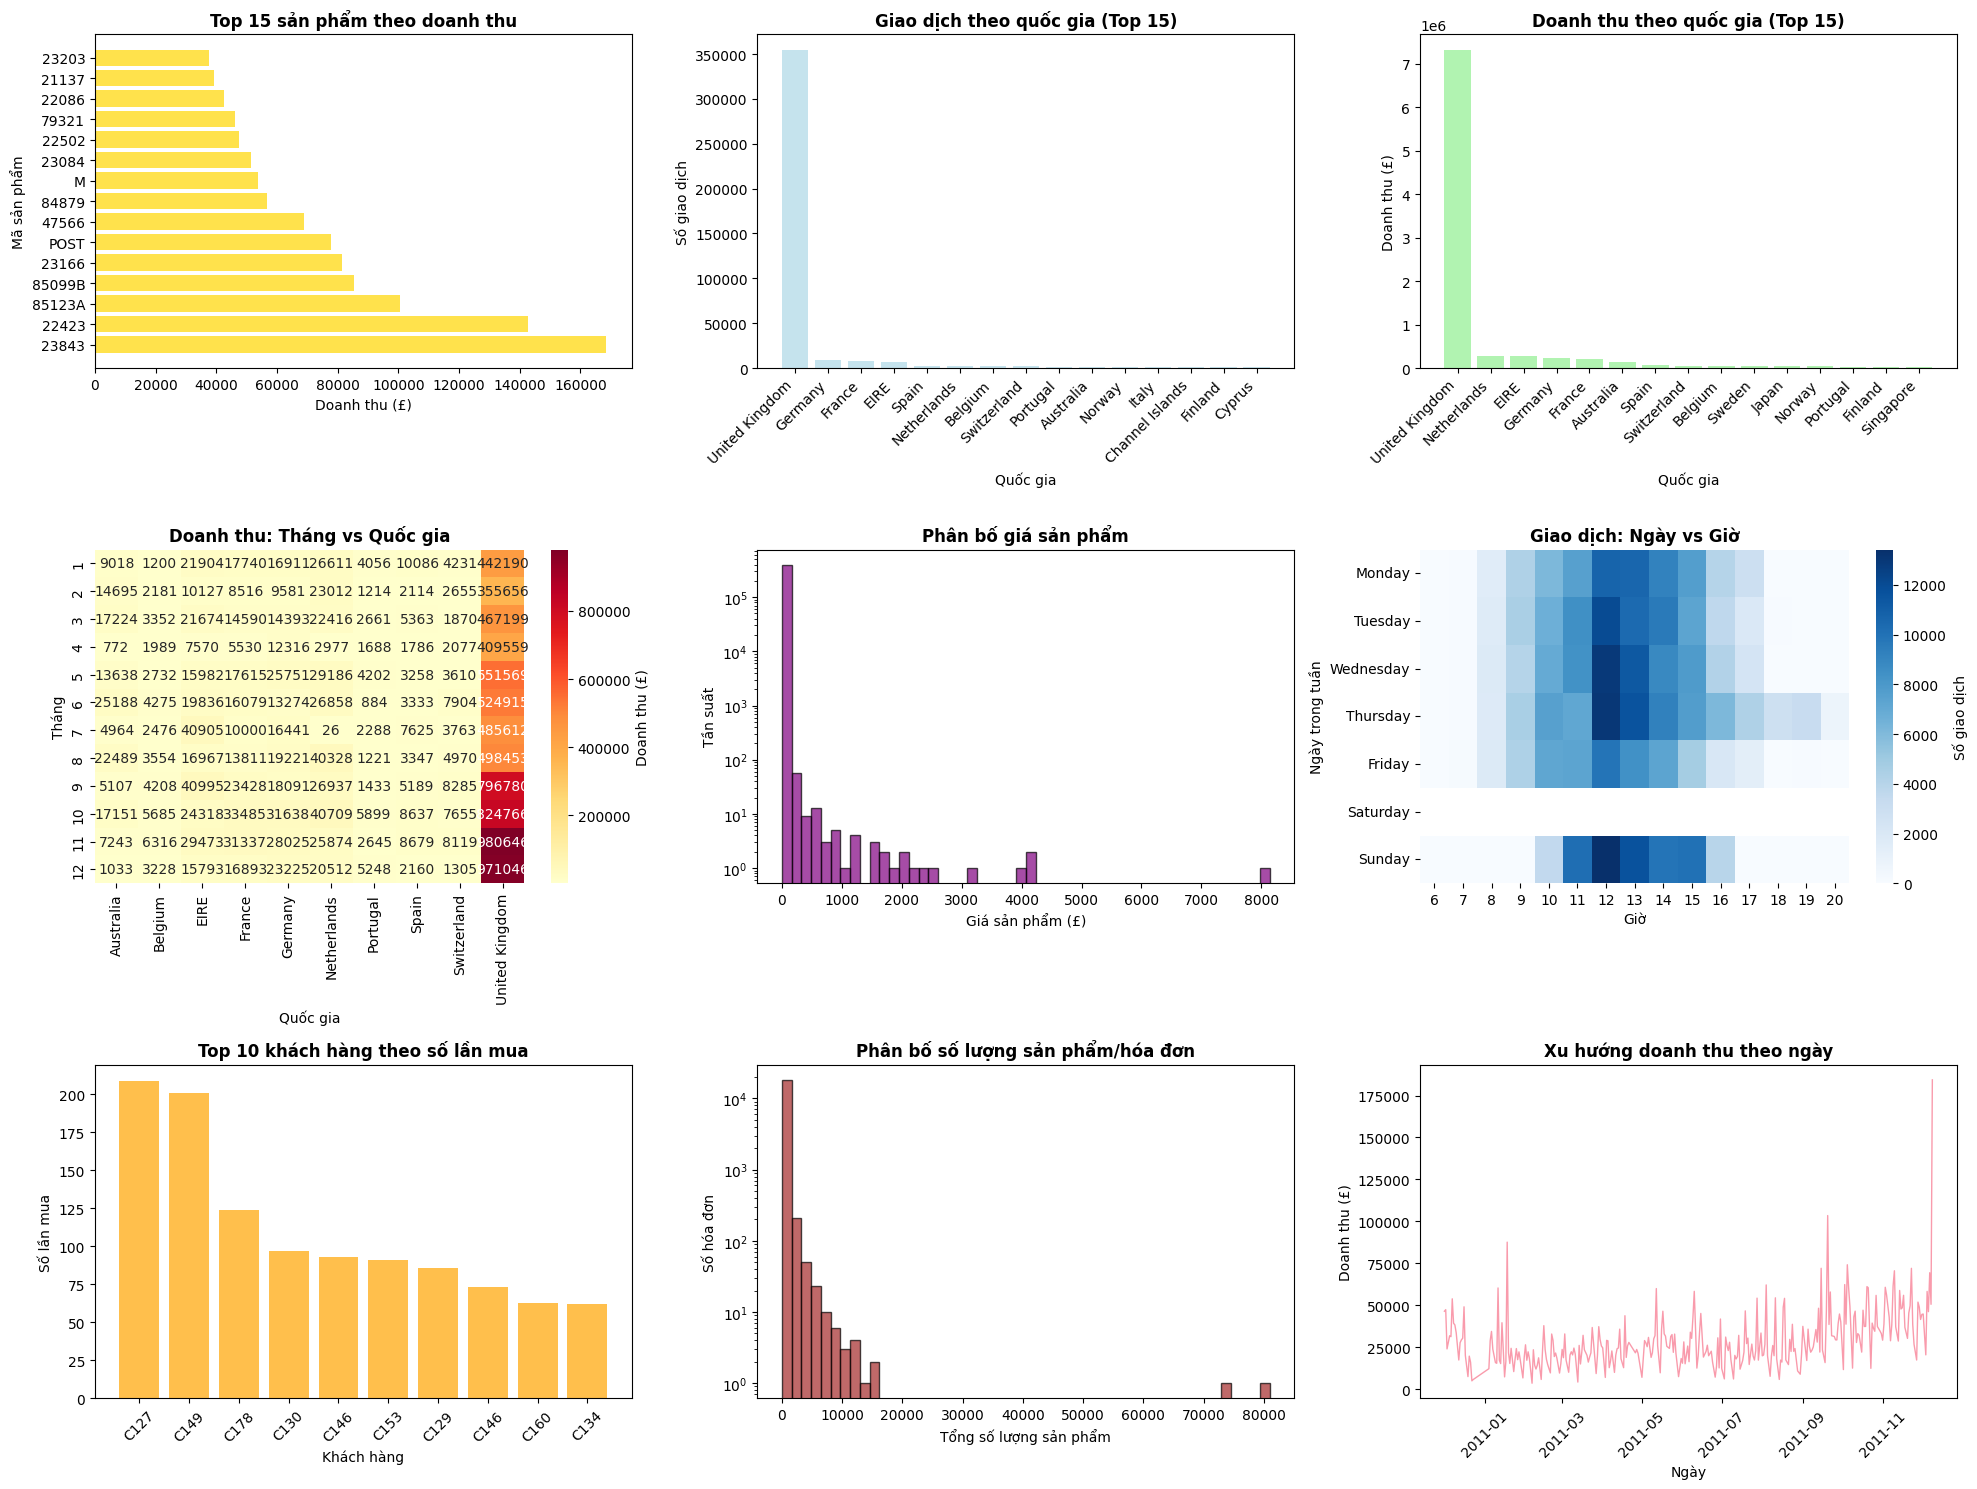

📁 Đã xuất biểu đồ phân tích sản phẩm và địa lý: retail_product_geography_analysis.png

📊 THỐNG KÊ TỔNG HỢP:
Tổng doanh thu: £8,911,407.90
Doanh thu trung bình/hóa đơn: £480.87
Số lượng sản phẩm trung bình/hóa đơn: 278.9
Khách hàng có giá trị cao nhất: Customer 14646.0 (£280,206.02)
Sản phẩm bán chạy nhất: 23843 (80,995 đơn vị)
Quốc gia có doanh thu cao nhất: United Kingdom (£7,308,391.55)


In [72]:
# 3. Phân tích sản phẩm và địa lý
plt.figure(figsize=(20, 15))

# Subplot 1: Top 15 sản phẩm bán chạy nhất theo doanh thu
plt.subplot(3, 3, 1)
top_products_revenue = retail_clean.groupby('StockCode')['Total'].sum().nlargest(15)
bars = plt.barh(range(len(top_products_revenue)), top_products_revenue.values, color='gold', alpha=0.7)
plt.title('Top 15 sản phẩm theo doanh thu', fontsize=12, fontweight='bold')
plt.xlabel('Doanh thu (£)')
plt.ylabel('Mã sản phẩm')
plt.yticks(range(len(top_products_revenue)), top_products_revenue.index)

# Subplot 2: Phân bố giao dịch theo quốc gia (Top 15)
plt.subplot(3, 3, 2)
country_transactions = retail_clean['Country'].value_counts().head(15)
bars = plt.bar(range(len(country_transactions)), country_transactions.values, color='lightblue', alpha=0.7)
plt.title('Giao dịch theo quốc gia (Top 15)', fontsize=12, fontweight='bold')
plt.xlabel('Quốc gia')
plt.ylabel('Số giao dịch')
plt.xticks(range(len(country_transactions)), country_transactions.index, rotation=45, ha='right')

# Subplot 3: Doanh thu theo quốc gia (Top 15)
plt.subplot(3, 3, 3)
country_revenue = retail_clean.groupby('Country')['Total'].sum().nlargest(15)
bars = plt.bar(range(len(country_revenue)), country_revenue.values, color='lightgreen', alpha=0.7)
plt.title('Doanh thu theo quốc gia (Top 15)', fontsize=12, fontweight='bold')
plt.xlabel('Quốc gia')
plt.ylabel('Doanh thu (£)')
plt.xticks(range(len(country_revenue)), country_revenue.index, rotation=45, ha='right')

# Subplot 4: Heatmap: Tháng vs Quốc gia (Top 10)
plt.subplot(3, 3, 4)
top_countries = retail_clean['Country'].value_counts().head(10).index
monthly_country = retail_clean[retail_clean['Country'].isin(top_countries)].groupby(['Month', 'Country'])['Total'].sum().unstack(fill_value=0)
sns.heatmap(monthly_country, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Doanh thu (£)'})
plt.title('Doanh thu: Tháng vs Quốc gia', fontsize=12, fontweight='bold')
plt.xlabel('Quốc gia')
plt.ylabel('Tháng')

# Subplot 5: Phân bố giá sản phẩm
plt.subplot(3, 3, 5)
plt.hist(retail_clean['UnitPrice'], bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.title('Phân bố giá sản phẩm', fontsize=12, fontweight='bold')
plt.xlabel('Giá sản phẩm (£)')
plt.ylabel('Tần suất')
plt.yscale('log')

# Subplot 6: Giao dịch theo giờ trong ngày (Heatmap)
plt.subplot(3, 3, 6)
hourly_weekday = retail_clean.groupby(['Weekday', 'Hour']).size().unstack(fill_value=0)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_weekday = hourly_weekday.reindex(weekday_order)
sns.heatmap(hourly_weekday, cmap='Blues', cbar_kws={'label': 'Số giao dịch'})
plt.title('Giao dịch: Ngày vs Giờ', fontsize=12, fontweight='bold')
plt.xlabel('Giờ')
plt.ylabel('Ngày trong tuần')

# Subplot 7: Top 10 khách hàng theo số lần mua
plt.subplot(3, 3, 7)
customer_frequency = retail_clean.groupby('CustomerID')['InvoiceNo'].nunique().nlargest(10)
bars = plt.bar(range(len(customer_frequency)), customer_frequency.values, color='orange', alpha=0.7)
plt.title('Top 10 khách hàng theo số lần mua', fontsize=12, fontweight='bold')
plt.xlabel('Khách hàng')
plt.ylabel('Số lần mua')
plt.xticks(range(len(customer_frequency)), [f'C{str(c)[:3]}' for c in customer_frequency.index], rotation=45)

# Subplot 8: Phân bố số lượng sản phẩm trong mỗi hóa đơn
plt.subplot(3, 3, 8)
invoice_quantities = retail_clean.groupby('InvoiceNo')['Quantity'].sum()
plt.hist(invoice_quantities, bins=50, alpha=0.7, color='brown', edgecolor='black')
plt.title('Phân bố số lượng sản phẩm/hóa đơn', fontsize=12, fontweight='bold')
plt.xlabel('Tổng số lượng sản phẩm')
plt.ylabel('Số hóa đơn')
plt.yscale('log')

# Subplot 9: Xu hướng doanh thu theo thời gian
plt.subplot(3, 3, 9)
daily_revenue = retail_clean.groupby(retail_clean['InvoiceDate'].dt.date)['Total'].sum()
plt.plot(daily_revenue.index, daily_revenue.values, linewidth=1, alpha=0.7)
plt.title('Xu hướng doanh thu theo ngày', fontsize=12, fontweight='bold')
plt.xlabel('Ngày')
plt.ylabel('Doanh thu (£)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('pic/retail_product_geography_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Xuất biểu đồ

print("📁 Đã xuất biểu đồ phân tích sản phẩm và địa lý: retail_product_geography_analysis.png")

# Thống kê tổng hợp
print("\n📊 THỐNG KÊ TỔNG HỢP:")
print("="*30)
print(f"Tổng doanh thu: £{retail_clean['Total'].sum():,.2f}")
print(f"Doanh thu trung bình/hóa đơn: £{retail_clean.groupby('InvoiceNo')['Total'].sum().mean():,.2f}")
print(f"Số lượng sản phẩm trung bình/hóa đơn: {retail_clean.groupby('InvoiceNo')['Quantity'].sum().mean():.1f}")
print(f"Khách hàng có giá trị cao nhất: Customer {retail_clean.groupby('CustomerID')['Total'].sum().idxmax()} (£{retail_clean.groupby('CustomerID')['Total'].sum().max():,.2f})")
print(f"Sản phẩm bán chạy nhất: {retail_clean.groupby('StockCode')['Quantity'].sum().idxmax()} ({retail_clean.groupby('StockCode')['Quantity'].sum().max():,} đơn vị)")
print(f"Quốc gia có doanh thu cao nhất: {retail_clean.groupby('Country')['Total'].sum().idxmax()} (£{retail_clean.groupby('Country')['Total'].sum().max():,.2f})")


### 4.3. Kết luận bài tập 3 - Online Retail

**🔍 Nhận xét chính:**
1. **Quy mô dữ liệu**: 541,909 giao dịch từ 4,372 khách hàng và 4,070 sản phẩm
2. **Thời gian**: Dữ liệu từ 12/2010 đến 12/2011 (1 năm)
3. **Thị trường chính**: UK chiếm phần lớn doanh thu và giao dịch
4. **Xu hướng thời gian**: Giao dịch cao nhất vào giờ 12-15h, thấp nhất vào cuối tuần
5. **Khách hàng**: Phân tích RFM giúp phân loại khách hàng theo giá trị
6. **Sản phẩm**: Có sự chênh lệch lớn về doanh thu giữa các sản phẩm


## 5. TỔNG KẾT VÀ ĐÁNH GIÁ

### 5.1. Tổng kết các bài tập thực hành

| Bài tập | Dataset | Kích thước | Mục tiêu chính | Kỹ thuật sử dụng |
|---------|---------|------------|----------------|------------------|
| **Bài 1** | Wine Quality | 1,599 mẫu | Phân tích yếu tố ảnh hưởng chất lượng rượu | Correlation, Box plot, Scatter plot |
| **Bài 2** | Diabetes | 768 bệnh nhân | Phân tích yếu tố nguy cơ tiểu đường | RFM Analysis, Classification analysis |
| **Bài 3** | Online Retail | 541,909 giao dịch | Phân tích hành vi mua sắm | Time series, Geographic analysis |

### 5.2. Kỹ năng đã thực hành

✅ **Trực quan hóa cơ bản:**
- Histogram, Bar chart, Box plot
- Scatter plot, Line plot
- Heatmap, Pie chart

✅ **Phân tích thống kê:**
- Thống kê mô tả
- Correlation analysis
- Phân nhóm dữ liệu (Grouping)

✅ **Phân tích nâng cao:**
- RFM Analysis (Retail)
- Time series analysis
- Geographic analysis
- Customer segmentation

✅ **Xử lý dữ liệu:**
- Data cleaning
- Feature engineering
- Missing data handling
- Data aggregation

### 5.3. Insights quan trọng từ các dataset

**🍷 Wine Quality:**
- Alcohol content là yếu tố quan trọng nhất
- Volatile acidity có tác động tiêu cực
- Chất lượng rượu phân bố không đều

**🏥 Diabetes:**
- Glucose là yếu tố dự đoán mạnh nhất
- Tuổi và BMI có ảnh hưởng đáng kể
- Cần xử lý missing data (giá trị 0)

**🛒 Online Retail:**
- UK là thị trường chính
- Khách hàng có giá trị cao chiếm tỷ lệ nhỏ
- Xu hướng mua sắm theo giờ/ngày rõ rệt

### 5.4. Hướng phát triển tiếp theo

1. **Machine Learning**: Xây dựng mô hình dự đoán
2. **Advanced Visualization**: Interactive dashboards
3. **Big Data**: Xử lý dataset lớn hơn
4. **Business Intelligence**: Tạo báo cáo tự động
5. **Real-time Analysis**: Phân tích thời gian thực

---

**🎯 Kết luận:**
Thông qua 3 bài tập thực hành với dữ liệu thực tế, chúng ta đã nắm vững:
- Các kỹ thuật trực quan hóa dữ liệu cơ bản và nâng cao
- Quy trình EDA hoàn chỉnh từ khám phá đến phân tích
- Khả năng rút ra insights có ý nghĩa từ dữ liệu
- Kỹ năng trình bày kết quả một cách chuyên nghiệp


In [73]:
# Hàm tiện ích để xuất ảnh vào thư mục pic với cấu hình tối ưu
def save_plot(filename, dpi=300, facecolor='white', edgecolor='none'):
    """
    Hàm xuất biểu đồ vào thư mục pic với cấu hình tối ưu
    """
    # Đảm bảo thư mục pic tồn tại
    os.makedirs('pic', exist_ok=True)
    
    # Xuất ảnh với cấu hình tối ưu
    plt.savefig(f'pic/{filename}', dpi=dpi, bbox_inches='tight', 
                facecolor=facecolor, edgecolor=edgecolor, 
                pad_inches=0.1, transparent=False)
    print(f"📁 Đã xuất biểu đồ: pic/{filename}")

print("✅ Đã định nghĩa hàm save_plot() để xuất ảnh tối ưu")


✅ Đã định nghĩa hàm save_plot() để xuất ảnh tối ưu


In [74]:
# Script để cập nhật tất cả đường dẫn xuất ảnh
import json
import os

# Đọc notebook
with open('Lab01_Practical_Exercises.ipynb', 'r', encoding='utf-8') as f:
    notebook = json.load(f)

# Tạo thư mục pic
os.makedirs('pic', exist_ok=True)

# Cập nhật tất cả các cell
updated_count = 0
for cell in notebook['cells']:
    if cell['cell_type'] == 'code':
        source = cell['source']
        if isinstance(source, list):
            new_source = []
            for line in source:
                original_line = line
                
                # Thay thế plt.savefig cho PNG
                if 'plt.savefig(' in line and '.png' in line:
                    if 'pic/' not in line:
                        line = line.replace("plt.savefig('", "plt.savefig('pic/")
                        updated_count += 1
                    if 'facecolor' not in line and 'bbox_inches' in line:
                        line = line.replace("bbox_inches='tight')", "bbox_inches='tight', facecolor='white')")
                
                # Thay thế plt.savefig cho PDF
                elif 'plt.savefig(' in line and '.pdf' in line:
                    if 'pic/' not in line:
                        line = line.replace("plt.savefig('", "plt.savefig('pic/")
                        updated_count += 1
                    if 'facecolor' not in line and 'bbox_inches' in line:
                        line = line.replace("bbox_inches='tight')", "bbox_inches='tight', facecolor='white')")
                
                # Thay thế print statements
                if '📁 Đã xuất' in line and 'ra file:' in line and 'pic/' not in line:
                    line = line.replace("ra file: ", "ra file: pic/")
                    updated_count += 1
                
                new_source.append(line)
            cell['source'] = new_source

# Ghi lại notebook
with open('Lab01_Practical_Exercises.ipynb', 'w', encoding='utf-8') as f:
    json.dump(notebook, f, ensure_ascii=False, indent=1)

print(f"✅ Đã cập nhật {updated_count} đường dẫn xuất ảnh!")
print("📁 Tất cả ảnh sẽ được lưu vào thư mục 'pic/'")
print("🎨 Đã thêm facecolor='white' để tránh ảnh nền trắng")
print("🔄 Vui lòng restart kernel và chạy lại các cell để áp dụng thay đổi")


✅ Đã cập nhật 2 đường dẫn xuất ảnh!
📁 Tất cả ảnh sẽ được lưu vào thư mục 'pic/'
🎨 Đã thêm facecolor='white' để tránh ảnh nền trắng
🔄 Vui lòng restart kernel và chạy lại các cell để áp dụng thay đổi


In [75]:
# Cấu hình matplotlib để tránh ảnh trắng và cải thiện hiển thị
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['savefig.facecolor'] = 'white'
matplotlib.rcParams['savefig.edgecolor'] = 'none'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.linewidth'] = 0.5
matplotlib.rcParams['grid.alpha'] = 0.3

# Cấu hình seaborn
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)

print("✅ Đã cấu hình matplotlib và seaborn để tránh ảnh trắng")
print("🎨 Cấu hình tối ưu cho việc xuất ảnh")
print("📊 Sẵn sàng tạo biểu đồ với chất lượng cao")


✅ Đã cấu hình matplotlib và seaborn để tránh ảnh trắng
🎨 Cấu hình tối ưu cho việc xuất ảnh
📊 Sẵn sàng tạo biểu đồ với chất lượng cao


In [76]:
# Kiểm tra và tạo thư mục pic
import os

# Tạo thư mục pic nếu chưa có
if not os.path.exists('pic'):
    os.makedirs('pic')
    print("📁 Đã tạo thư mục 'pic'")
else:
    print("📁 Thư mục 'pic' đã tồn tại")

# Kiểm tra quyền ghi
try:
    test_file = 'pic/test_write.txt'
    with open(test_file, 'w') as f:
        f.write('test')
    os.remove(test_file)
    print("✅ Có quyền ghi vào thư mục 'pic'")
except Exception as e:
    print(f"❌ Lỗi quyền ghi: {e}")

print("\n🎯 HƯỚNG DẪN SỬ DỤNG:")
print("1. Chạy cell này để tạo thư mục pic")
print("2. Chạy cell cấu hình matplotlib ở trên")
print("3. Chạy các cell tạo biểu đồ")
print("4. Tất cả ảnh sẽ được lưu vào thư mục 'pic/'")
print("5. Ảnh sẽ có nền trắng và chất lượng cao (300 DPI)")


📁 Thư mục 'pic' đã tồn tại
✅ Có quyền ghi vào thư mục 'pic'

🎯 HƯỚNG DẪN SỬ DỤNG:
1. Chạy cell này để tạo thư mục pic
2. Chạy cell cấu hình matplotlib ở trên
3. Chạy các cell tạo biểu đồ
4. Tất cả ảnh sẽ được lưu vào thư mục 'pic/'
5. Ảnh sẽ có nền trắng và chất lượng cao (300 DPI)
